# **Data Mining Project** 
# Task 3: Predictive Analysis
Pistolesi Veronica, Poli Francesca

## Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy
import scipy.stats as stats
import sklearn
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import statistics 
import pydotplus 
from IPython.display import Image  

from collections import defaultdict
from scipy.stats import pearsonr
from scipy.stats import entropy
from sklearn import metrics
from sklearn import linear_model

In [ ]:
from xgboost import XGBClassifier
from sklearn import preprocessing
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier as decision_tree
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from scipy.stats import randint
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#additional methods for classification
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier

In [ ]:
#metrics computed on the test set
from sklearn.metrics import classification_report
def report_scores(ts_label, test_pred):
    print(classification_report(ts_label, 
                            test_pred, 
                            target_names=['human (0)', 'bot (1)']))

In [ ]:
!pip install matplotlib --upgrade

## Data loading

In [ ]:
users_profile = pd.read_csv('/content/drive/Shareddrives/DataMining/dataset/users_profile.csv', lineterminator='\n')

In [ ]:
users_profile.head()

,user_id,name,lang,bot,user_created_at,statuses_count,retweet_count,reply_count,favorite_count,num_hashtags,...,hour_entropy,favcount_entropy,retcount_entropy,repcount_entropy,has_entropy,url_entropy,men_entropy,avg_textlen,days_on_tw,activity_richness
0,678033,Heather Gold,en,0,2012-01-24 01:57:38,45825,187157.0,0.0,1201.0,868.0,...,0.0,8.831943,6.080426,0.0,9.183814,9.578214,10.607494,109.637321,3900,0.608718
1,722623,Buzz Jackson,en,0,2012-01-31 00:54:34,11770,1158520.0,0.0,969.0,766.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,85.026719,3893,0.519137
2,755116,呉⚛,en,0,2012-02-08 05:25:49,39158,92396.0,0.0,391.0,77.0,...,0.0,3.921117,2.375534,0.0,4.836434,5.114369,6.387527,80.780317,3885,0.551866
3,755746,Sarah Friedlander G.,en,0,2012-02-09 05:21:24,18035,317861.0,0.0,209.0,488.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,84.281111,3884,0.519310
4,785080,W H,en,0,2012-02-23 01:08:16,22496,138486.0,0.0,1714.0,185.0,...,0.0,8.277790,2.354578,0.0,8.421512,8.222893,9.556485,95.166473,3870,0.887855


In [ ]:
users_profile.describe()

,user_id,bot,statuses_count,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,max_retweet_count,...,hour_entropy,favcount_entropy,retcount_entropy,repcount_entropy,has_entropy,url_entropy,men_entropy,avg_textlen,days_on_tw,activity_richness
count,1.150800e+04,11508.000000,11508.000000,1.150800e+04,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,...,11508.000000,11508.000000,11508.000000,11508.0,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000
mean,1.274517e+09,0.531456,5566.570473,5.028411e+05,166.536583,1276.701078,178.669013,182.651199,505.974105,36891.856882,...,0.061844,1.906487,1.066179,0.0,1.986260,2.034642,2.565031,70.299716,1820.613399,0.509723
std,9.354135e+08,0.499031,17120.740691,2.978291e+06,1143.118244,20080.225205,496.481408,455.009101,1012.748948,98009.687310,...,0.340502,3.096155,1.707308,0.0,3.193921,3.248886,3.674023,16.597382,552.448001,0.699536
min,6.780330e+05,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,3.000000,890.000000,0.000319
25%,4.663594e+08,0.000000,42.000000,3.000000e+00,0.000000,3.000000,5.000000,0.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,61.367982,1311.000000,0.034878
50%,1.128643e+09,1.000000,68.000000,4.000000e+01,0.000000,10.000000,11.000000,2.000000,37.000000,7.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,67.598590,1702.000000,0.103817
75%,2.357148e+09,1.000000,2520.250000,5.552725e+04,0.000000,414.250000,122.000000,98.000000,514.250000,11447.250000,...,0.000000,2.522878,1.694437,0.0,2.947703,2.807355,4.037033,79.771721,2079.000000,0.801398
max,3.164942e+09,1.000000,200000.000000,9.936067e+07,20001.000000,822127.000000,16228.000000,4335.000000,13664.000000,500000.000000,...,3.526946,9.690630,6.369161,0.0,9.898855,10.002679,11.173624,245.000000,3900.000000,4.148438


In [ ]:
users_profile_from_clustering = pd.read_csv('/content/drive/Shareddrives/DataMining/dataset/users_profile_clustering.csv', lineterminator='\n')

In [ ]:
users_profile_from_clustering.head()

,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,num_mentions,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,text_entropy,avg_textlen,days_on_tw,activity_richness
0,45825,187157.0,1201.0,868.0,793.0,2643.0,21325.0,34.0,723.522858,1.419478,79.342039,1.812974,11.120054,109.637321,3900,0.608718
1,11770,1158520.0,969.0,766.0,345.0,1357.0,296689.0,19.0,11508.209770,1.078419,573.720435,1.221178,0.000000,85.026719,3893,0.519137
2,39158,92396.0,391.0,77.0,318.0,2113.0,13121.0,8.0,546.629170,0.490437,43.277519,1.169776,6.843951,80.780317,3885,0.551866
3,18035,317861.0,209.0,488.0,848.0,1475.0,105138.0,7.0,3359.356296,0.392886,157.694596,1.393654,0.000000,84.281111,3884,0.519310
4,22496,138486.0,1714.0,185.0,234.0,2662.0,16181.0,32.0,462.741573,1.166943,40.803260,0.896682,10.333883,95.166473,3870,0.887855


In [ ]:
users_profile_from_clustering.describe()

,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,num_mentions,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,text_entropy,avg_textlen,days_on_tw,activity_richness
count,11508.000000,1.150800e+04,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000
mean,5566.570473,5.028411e+05,1276.701078,178.669013,182.651199,505.974105,36891.856882,217.869743,1710.423188,16.148780,333.089415,0.659675,2.820320,70.299716,1820.613399,0.509723
std,17120.740691,2.978291e+06,20080.225205,496.481408,455.009101,1012.748948,98009.687310,1234.961104,5439.128479,124.188737,2097.311695,1.147800,3.912208,16.597382,552.448001,0.699536
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,890.000000,0.000319
25%,42.000000,3.000000e+00,3.000000,5.000000,0.000000,2.000000,1.000000,1.000000,0.153650,0.156763,0.074074,0.277483,0.000000,61.367982,1311.000000,0.034878
50%,68.000000,4.000000e+01,10.000000,11.000000,2.000000,37.000000,7.000000,2.000000,0.656625,0.263814,0.436814,0.416667,0.000000,67.598590,1702.000000,0.103817
75%,2520.250000,5.552725e+04,414.250000,122.000000,98.000000,514.250000,11447.250000,12.000000,957.771862,0.807301,119.720632,0.847882,4.566561,79.771721,2079.000000,0.801398
max,200000.000000,9.936067e+07,822127.000000,16228.000000,4335.000000,13664.000000,500000.000000,10000.000000,106034.982635,3722.299247,69042.400000,41.833333,11.821278,245.000000,3900.000000,4.148438


## Little Data Preparation step

To facilitate the classification task, we decided to select only the year from the date of creation of the twitter account (the *'user_created_at'* column) and create a new indicator from it.

In [ ]:
users_profile.user_created_at = pd.to_datetime(users_profile.user_created_at, format='%Y-%m-%d %H:%M:%S').dt.date

In [ ]:
users_profile['sub_year']=users_profile['user_created_at'].apply(lambda x: x.year) #select only the year of every user's subscription 

# Preprocessing and feature selection

We load the dataset consisting of only numerical features that was created for clustering, because it was already cleaned from correlations higher than **0.8**.
We distinguish here the features' types for the encoding phase, namely categorical, numerical and binary features.

In [ ]:
users_profile_n = users_profile_from_clustering
users_profile_c = users_profile[['lang', 'most_freq_year', 'most_freq_hour', 'sub_year']]
users_profile_b = users_profile[['bot', 'nightly']]

Categoricals:
- lang
- bot 
- user_created_at
- nightly
- most_freq_year
- most_freq_hour
- sub_year

## Data normalization  
A good practice to avoid the bias given by the range of the different attribute is normalization.  
The most common adopted normalizations are: Z-Score and Min-Max.
In our project, we performed z-score normalization of the dataset, which standardizes features such that the mean of all of the values is 0 and the standard deviation is 1.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
cols = users_profile_n.columns
users_profile_n = pd.DataFrame(scaler.fit_transform(users_profile_n.values), columns=cols)

In [ ]:
users_profile_n.head()

,statuses_count,retweet_count,favorite_count,num_hashtags,num_urls,num_mentions,max_retweet_count,max_favorite_count,std_retweet_count,std_favorite_count,popularity,tweet_richness,text_entropy,avg_textlen,days_on_tw,activity_richness
0,2.351544,-0.106000,-0.003770,1.388493,1.341457,2.110216,-0.158837,-0.148894,-0.181452,-0.118609,-0.120992,1.004835,2.121588,2.370212,3.764113,0.141522
1,0.362350,0.220162,-0.015324,1.183038,0.356819,0.840349,2.650844,-0.161040,1.801431,-0.121356,0.114738,0.489220,-0.720934,0.887347,3.751442,0.013458
2,1.962117,-0.137818,-0.044110,-0.204788,0.297477,1.586865,-0.242546,-0.169948,-0.213976,-0.126091,-0.138189,0.444436,1.028526,0.631489,3.736960,0.060247
3,0.728296,-0.062112,-0.053174,0.623074,1.462339,0.956869,0.696351,-0.170758,0.303174,-0.126876,-0.083632,0.639494,-0.720934,0.842422,3.735150,0.013706
4,0.988869,-0.122342,0.021779,0.012752,0.112857,2.128977,-0.211324,-0.150513,-0.229400,-0.120643,-0.139368,0.206497,1.920626,1.498299,3.709807,0.540571


In [ ]:
users_profile_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11508 entries, 0 to 11507
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   statuses_count      11508 non-null  float64
 1   retweet_count       11508 non-null  float64
 2   favorite_count      11508 non-null  float64
 3   num_hashtags        11508 non-null  float64
 4   num_urls            11508 non-null  float64
 5   num_mentions        11508 non-null  float64
 6   max_retweet_count   11508 non-null  float64
 7   max_favorite_count  11508 non-null  float64
 8   std_retweet_count   11508 non-null  float64
 9   std_favorite_count  11508 non-null  float64
 10  popularity          11508 non-null  float64
 11  tweet_richness      11508 non-null  float64
 12  text_entropy        11508 non-null  float64
 13  avg_textlen         11508 non-null  float64
 14  days_on_tw          11508 non-null  float64
 15  activity_richness   11508 non-null  float64
dtypes: f

## Numerical features' selection: SelectFromModel with Random Forest classifier
SelectFromModel is a ScikitLearn meta-transformer for selecting features based on importance weights and a base estimator from which the transformer is built.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel

In [ ]:
X = users_profile_n
y = users_profile_b.bot
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [ ]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier())

In [ ]:
#To see which features are important we can use get_support method on the fitted model.
sel.get_support()

array([ True,  True, False, False, False,  True,  True, False,  True,
       False,  True,  True, False,  True, False,  True])

In [ ]:
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)

9

In [ ]:
print(selected_feat)

Index(['statuses_count', 'retweet_count', 'num_mentions', 'max_retweet_count',
       'std_retweet_count', 'popularity', 'tweet_richness', 'avg_textlen',
       'activity_richness'],
      dtype='object')


In [ ]:
#pd.series(sel.estimator_.feature_importances_,sel.ravel()).hist()

In [ ]:
sel.estimator_.feature_importances_

array([0.10522934, 0.08911207, 0.02407831, 0.04930591, 0.02376299,
       0.12004428, 0.07509593, 0.01077865, 0.07981759, 0.03705094,
       0.06899184, 0.09174169, 0.02640415, 0.07019788, 0.04741411,
       0.08097432])

Text(0.5, 0, 'Random Forest Classifier Feature Importance')

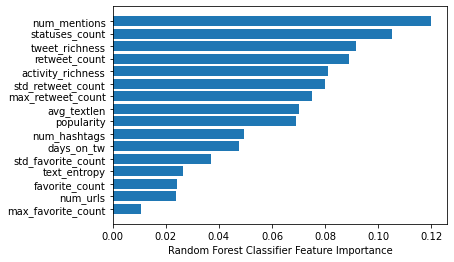

In [ ]:
sorted_idx = sel.estimator_.feature_importances_.argsort()
plt.barh(users_profile_n.columns[sorted_idx], sel.estimator_.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Classifier Feature Importance")

In [ ]:
# num_mentions, statuses_count, retweet_count, activity_richness, std_retweet_count, max_retweet_count, avg_textlen, tweet_richness

Selecting features by using tree derived feature importance is a very straightforward, fast and generally accurate way of selecting good features for machine learning, even more if we are going to build tree methods.
However, some limitations of Random Forest Classifier are:
* Correlated features will be given equal or similar importance, but overall reduced importance compared to the same tree built without correlated counterparts.
* Random Forests and decision trees, in general, give preference to features with high cardinality ( Trees are biased to these type of variables).

So, in situations like these a good practice might be to select the features manually after a feature importance analysis, as has been done in the other classification notebooks.

## Categorical features' selection with SelectKbest 
SelectKbest is a ScikitLearn function that calculates a score to help keeping only the most important features in your dataset, returning the features according to the k highest scores. 


Feature 0: 256.714172
Feature 1: 146.487701
Feature 2: 122.168159
Feature 3: 202.668845
Feature 4: 44.541083


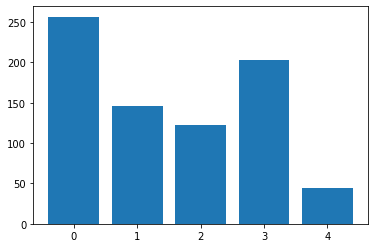

In [ ]:
# chi squared feature selection for categorical data
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from matplotlib import pyplot

# prepare input data
def prepare_inputs(X_train, X_test):
	oe = OrdinalEncoder()
	oe.fit(X_train)
	X_train_enc = oe.transform(X_train)
	X_test_enc = oe.transform(X_test)
	return X_train_enc, X_test_enc

# prepare target
def prepare_targets(y_train, y_test):
	le = LabelEncoder()
	le.fit(y_train)
	y_train_enc = le.transform(y_train)
	y_test_enc = le.transform(y_test)
	return y_train_enc, y_test_enc

# feature selection
def select_features(X_train, y_train, X_test):
  col = []
  fs = SelectKBest(score_func=chi2, k='all')
  fs.fit(X_train, y_train)
  col = fs.get_feature_names_out()
  X_train_fs = fs.transform(X_train)
  X_test_fs = fs.transform(X_test)
  return X_train_fs, X_test_fs, fs, col

# load the dataset
X = users_profile[['lang', 'most_freq_year', 'most_freq_hour', 'sub_year', 'nightly']]
X = X.astype(str)
y = users_profile_b.bot
y = y.astype(str)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
# feature selection
X_train_fs, X_test_fs, fs, col = select_features(X_train_enc, y_train_enc, X_test_enc)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [ ]:
col

array(['x0', 'x1', 'x2', 'x3', 'x4'], dtype=object)

In [ ]:
fs.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x3', 'x4'], dtype=object)

In [ ]:
# 0 3 1 2 4
# 'lang', 0
# 'sub_year', 3
# 'most_freq_year', 1
# 'most_freq_hour', 2
# 'nightly' 4

## OneHot Encoding 
We used the One Hot Encoding method to convert each categorical value into a new categorical column and assign a binary value of 1 or 0 to those columns. Each integer value is represented as a binary vector. All the values are zero, and the index is marked with a 1.

In [ ]:
users_profile_c = pd.get_dummies(users_profile[['lang', 'sub_year']], columns=users_profile[['lang', 'sub_year']].columns)

In [ ]:
users_profile_c.head()

,lang_ar,lang_da,lang_de,lang_el,lang_en,lang_en-au,lang_en-gb,lang_es,lang_fr,lang_id,...,lang_zh-tw,sub_year_2012,sub_year_2013,sub_year_2014,sub_year_2015,sub_year_2016,sub_year_2017,sub_year_2018,sub_year_2019,sub_year_2020
0,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
#dfs = [users_profile_n, users_profile_c, users_profile_b]
users_profile = users_profile_n[selected_feat].join(users_profile_c) 
users_profile = users_profile.join(users_profile_b.bot) 

In [ ]:
print(list(users_profile.columns))

['statuses_count', 'retweet_count', 'num_mentions', 'max_retweet_count', 'std_retweet_count', 'popularity', 'tweet_richness', 'avg_textlen', 'activity_richness', 'lang_ar', 'lang_da', 'lang_de', 'lang_el', 'lang_en', 'lang_en-au', 'lang_en-gb', 'lang_es', 'lang_fr', 'lang_id', 'lang_it', 'lang_ja', 'lang_ko', 'lang_nl', 'lang_pl', 'lang_pt', 'lang_ru', 'lang_sv', 'lang_tr', 'lang_zh-cn', 'lang_zh-tw', 'sub_year_2012', 'sub_year_2013', 'sub_year_2014', 'sub_year_2015', 'sub_year_2016', 'sub_year_2017', 'sub_year_2018', 'sub_year_2019', 'sub_year_2020', 'bot']


In [ ]:
users_profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11508 entries, 0 to 11507
Data columns (total 40 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   statuses_count     11508 non-null  float64
 1   retweet_count      11508 non-null  float64
 2   num_mentions       11508 non-null  float64
 3   max_retweet_count  11508 non-null  float64
 4   std_retweet_count  11508 non-null  float64
 5   popularity         11508 non-null  float64
 6   tweet_richness     11508 non-null  float64
 7   avg_textlen        11508 non-null  float64
 8   activity_richness  11508 non-null  float64
 9   lang_ar            11508 non-null  uint8  
 10  lang_da            11508 non-null  uint8  
 11  lang_de            11508 non-null  uint8  
 12  lang_el            11508 non-null  uint8  
 13  lang_en            11508 non-null  uint8  
 14  lang_en-au         11508 non-null  uint8  
 15  lang_en-gb         11508 non-null  uint8  
 16  lang_es            115

In [ ]:
users_profile.head()

,statuses_count,retweet_count,num_mentions,max_retweet_count,std_retweet_count,popularity,tweet_richness,avg_textlen,activity_richness,lang_ar,...,sub_year_2012,sub_year_2013,sub_year_2014,sub_year_2015,sub_year_2016,sub_year_2017,sub_year_2018,sub_year_2019,sub_year_2020,bot
0,2.351544,-0.106000,2.110216,-0.158837,-0.181452,-0.120992,1.004835,2.370212,0.141522,0,...,1,0,0,0,0,0,0,0,0,0
1,0.362350,0.220162,0.840349,2.650844,1.801431,0.114738,0.489220,0.887347,0.013458,0,...,1,0,0,0,0,0,0,0,0,0
2,1.962117,-0.137818,1.586865,-0.242546,-0.213976,-0.138189,0.444436,0.631489,0.060247,0,...,1,0,0,0,0,0,0,0,0,0
3,0.728296,-0.062112,0.956869,0.696351,0.303174,-0.083632,0.639494,0.842422,0.013706,0,...,1,0,0,0,0,0,0,0,0,0
4,0.988869,-0.122342,2.128977,-0.211324,-0.229400,-0.139368,0.206497,1.498299,0.540571,0,...,1,0,0,0,0,0,0,0,0,0


## Dataset splitting into train and test datasets

To classify, we first need to split the dataset into train and test dataset.
We can do so using train_test_split, in this case we select a stratified split (we want to maintain the same ratio among the classes).

In [ ]:
from sklearn.model_selection import train_test_split
label = users_profile.pop('bot')
tr_set, ts_set, tr_label, ts_label = train_test_split(users_profile, label, stratify=label, test_size=0.20) 

In [ ]:
tr_set.head()

,statuses_count,retweet_count,num_mentions,max_retweet_count,std_retweet_count,popularity,tweet_richness,avg_textlen,activity_richness,lang_ar,...,lang_zh-tw,sub_year_2012,sub_year_2013,sub_year_2014,sub_year_2015,sub_year_2016,sub_year_2017,sub_year_2018,sub_year_2019,sub_year_2020
3984,-0.320302,-0.160810,-0.494689,-0.307451,-0.115187,-0.043207,-0.398741,-0.618079,-0.655016,0,...,0,0,0,0,0,0,1,0,0,0
6577,-0.323982,-0.168843,-0.499626,-0.376427,-0.314480,-0.158824,-0.429544,-0.324802,-0.708341,0,...,0,0,0,0,0,0,0,1,0,0
5629,-0.323982,-0.166407,-0.496664,-0.323654,-0.099980,0.005952,-0.284332,0.376599,-0.711052,0,...,0,0,0,0,0,0,0,1,0,0
1578,1.182736,0.355085,2.856731,0.165860,0.150108,0.044219,0.316484,-0.695435,1.392531,0,...,0,0,0,0,1,0,0,0,0,0
2876,-0.321003,-0.168394,-0.495677,-0.372202,-0.311545,-0.157757,-0.497511,1.129336,0.326133,0,...,0,0,0,0,0,0,1,0,0,0


#### Checking data balance

In [ ]:
tr_label.value_counts()

1    4893
0    4313
Name: bot, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


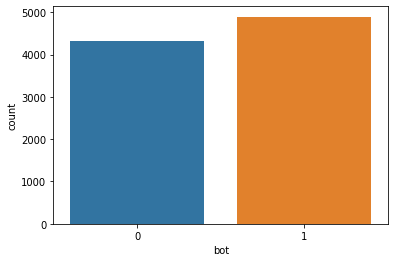

In [ ]:
sns.countplot(tr_label)

In [ ]:
ts_label.value_counts()

1    1223
0    1079
Name: bot, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


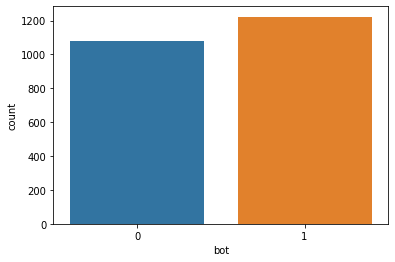

In [ ]:
sns.countplot(ts_label)

# Classifiers

## Classification with Decision Tree
Decision tree classifiers are supervised machine learning models that use prelabelled data in order to train an algorithm that can be used to make a prediction. 
They work like flowchart: each node of a decision tree represents a decision point that splits into two leaf nodes. Each of these nodes represents the outcome of the decision and each of the decisions can also turn into decision nodes. Eventually, the different decisions will lead to a final classification.

### Random search for parameter setting 
For improving the performance of our model, we can run a grid search: we can select the values we want to test for each parameter, and then run the RandomizedSearchCV, which evaluates the best set of values parameters with a good trade-off with time costs.

In [ ]:
param_dist = { 
    'criterion':['gini', 'entropy'],
     'splitter':['best'],
     'max_depth': [None, 3, 4, 5, 6, 7, 8, 9],   
     'min_samples_split': list(np.arange(2,60, 3)),    #randint(2, 40), 
     'min_samples_leaf': list(np.arange(2,60, 3)),   #np.arange(start=10, stop=60, step=1), 
     'max_features': [None, "auto", "sqrt", "log2", 2, 3, 4, 5, 6, 7, 8, 9],  
     "class_weight":['balanced', None]
}

In [ ]:
#hyperparameter tuning with random search CV
n_iter_search = 100
n_jobs_search = -1

dt_search = decision_tree(random_state=42) 
kfold = StratifiedKFold(n_splits=10)

dt_cv = RandomizedSearchCV(estimator=dt_search, param_distributions=param_dist, scoring=make_scorer(accuracy_score), n_jobs=n_jobs_search, cv=kfold)#n_iter=n_iter_search, 
dt_cv.fit(tr_set, tr_label)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
                   param_distributions={'class_weight': ['balanced', None],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 3, 4, 5, 6, 7, 8,
                                                      9],
                                        'max_features': [None, 'auto', 'sqrt',
                                                         'log2', 2, 3, 4, 5, 6,
                                                         7, 8, 9],
                                        'min_samples_leaf': [2, 5, 8, 11, 14,
                                                             17, 20, 23, 26, 29,
                                                             32, 35, 38, 41, 44,
                                                             47, 50, 53, 56,
    

In [ ]:
dt_cv.best_params_

{'splitter': 'best',
 'min_samples_split': 2,
 'min_samples_leaf': 8,
 'max_features': 6,
 'max_depth': 6,
 'criterion': 'entropy',
 'class_weight': None}

### Final model

In [ ]:
dec_tree = decision_tree(**dt_cv.best_params_).fit(tr_set, tr_label)

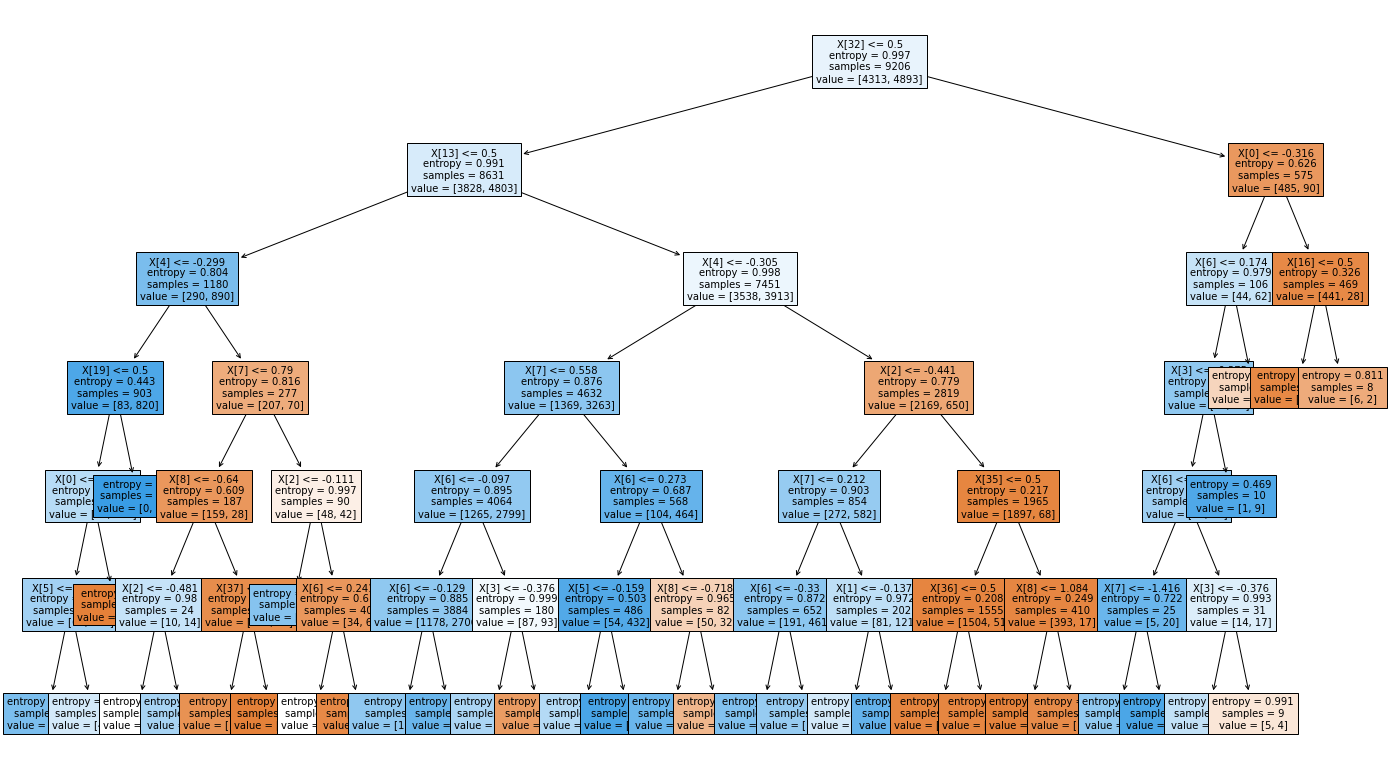

In [ ]:
plt.figure(figsize=(24,14))
tree.plot_tree(dec_tree, filled=True, fontsize=10)
plt.show()

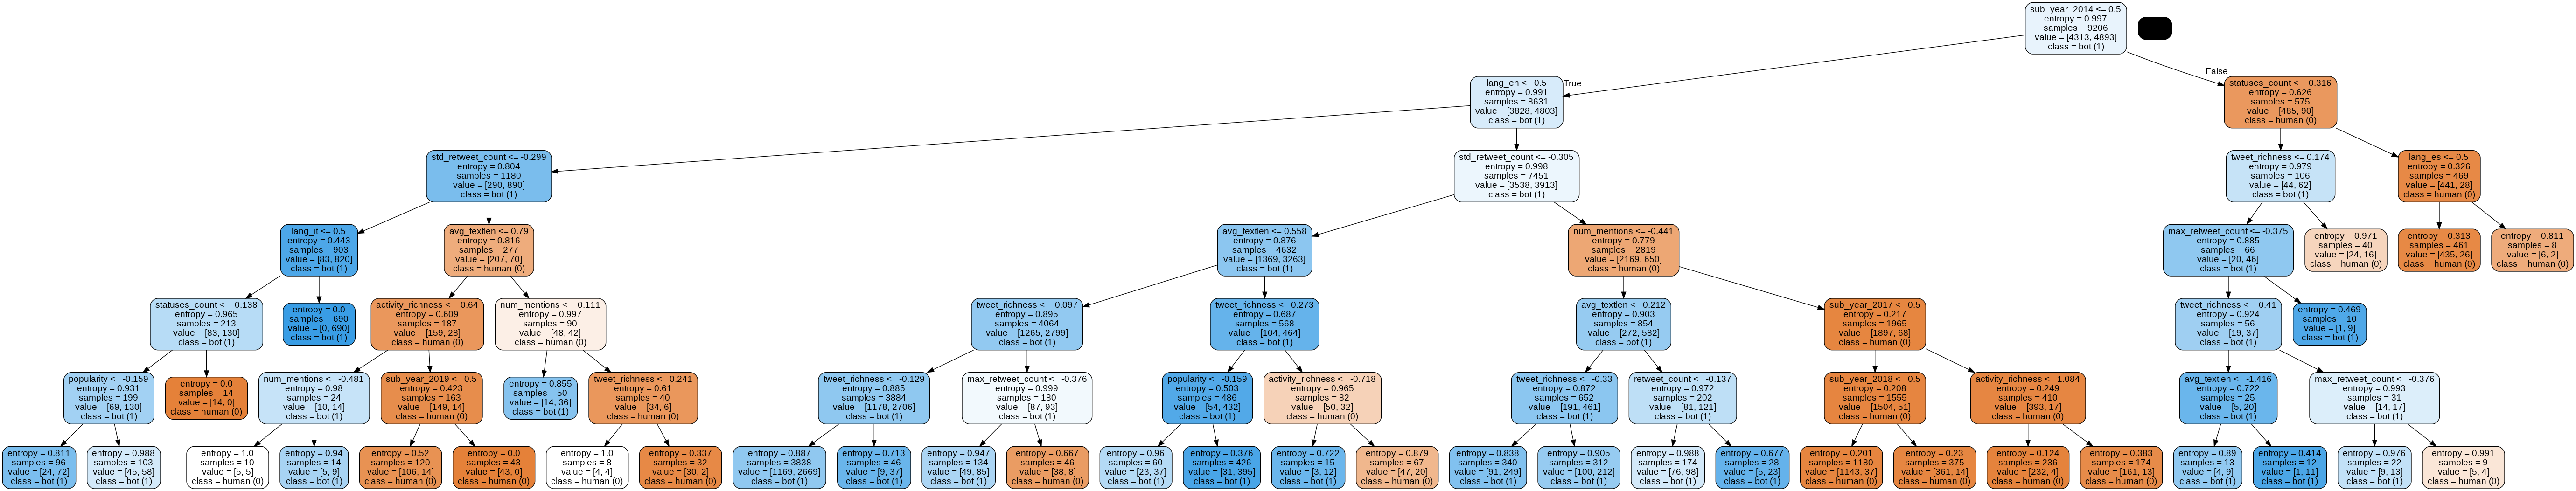

In [ ]:
dot_data = tree.export_graphviz(dec_tree, out_file=None, 
                         feature_names=list(tr_set.columns),  
                         class_names=['human (0)', 'bot (1)'],  
                         filled=True, rounded=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

In [ ]:
#predict using the decision tree
#the predict function returns the actual predicted labels: we need them for the evaluation phase
train_pred_dt = dec_tree.predict(tr_set)
test_pred_dt = dec_tree.predict(ts_set)

### Evaluation of the decision tree: compute accuracy, precision, recall, confusion matrix
After having fitted the model, it is important to understand how the model is performing. To evaluate the goodness of the model, we can compute several metrics, such as accuracy, precision and recall. Pay attention to the fact that not all the metrics are meaningfull, depending on the imbalance in the dataset.

In [ ]:
#evaulate the accuracy on the train set and the test set
#metrics also contains precision, recall, f1 and the support
print('Accuracy train set ', metrics.accuracy_score(tr_label, train_pred_dt))
print('Accuracy test set ', metrics.accuracy_score(ts_label, test_pred_dt))
print('Precision train set ', metrics.precision_score(tr_label, train_pred_dt, average='weighted'))
print('Recall train set ', metrics.recall_score(tr_label, train_pred_dt, average='weighted'))
print('F1 score train set ', metrics.f1_score(tr_label, train_pred_dt, average='weighted'))
print('Support train set ', metrics.precision_recall_fscore_support(tr_label, train_pred_dt))

Accuracy train set  0.8014338474907668
Accuracy test set  0.7962641181581234
Precision train set  0.8338111205616887
Recall train set  0.8014338474907668
F1 score train set  0.7938226686603144
Support train set  (array([0.94013461, 0.74009087]), array([0.61534895, 0.96546086]), array([0.74383408, 0.83788578]), array([4313, 4893]))


In [ ]:
report_scores(ts_label, test_pred_dt)

              precision    recall  f1-score   support

   human (0)       0.92      0.62      0.74      1079
     bot (1)       0.74      0.96      0.83      1223

    accuracy                           0.80      2302
   macro avg       0.83      0.79      0.79      2302
weighted avg       0.83      0.80      0.79      2302



To better evaluate the performance of our model, we use the cross-validation. We can do so exploiting a function from sklearn. Then, we can compute the score array for test/train scores on each cv split as well as the time for fitting/scoring the estimator on the train set for each cv split.

In [ ]:
scores = cross_validate(dec_tree, tr_set, tr_label, cv=3, return_train_score= True)
print('Fit time ', statistics.mean(scores['fit_time']))
print('Score time ', statistics.mean(scores['score_time']))
print('Test score ', statistics.mean(scores['test_score']))
print('Train score ', statistics.mean(scores['train_score']))

Fit time  0.023537953694661457
Score time  0.004541476567586263
Test score  0.7913307557922101
Train score  0.797578007707471


Another kind of evaluation is the confusion matrix, in which we can clearly see the number of true positive, false positive, true negative, false negative.

In [ ]:
#compute confusion matrix
cm = confusion_matrix(ts_label, test_pred_dt)
cm

array([[ 665,  414],
       [  55, 1168]])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


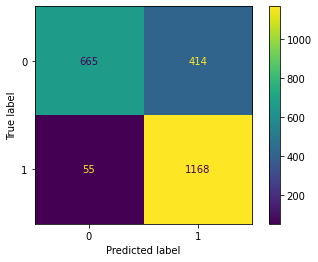

In [ ]:
#it is possible to plot the confusion matrix 
plot_confusion_matrix(dec_tree, ts_set, ts_label)
plt.show() 

Another visualization of the behaviour of the model is to exploit scatter plots. We can plot the data points, w.r.t. 2 or 3 features, coloring the points depending on the labels: first, with the original labels, then the predicted labels.

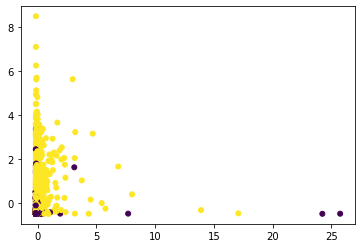

In [ ]:
#true labels
plt.scatter(ts_set.iloc[:, 5].values, ts_set.iloc[:, 2].values, c=ts_label.values, s=25, cmap='viridis_r');

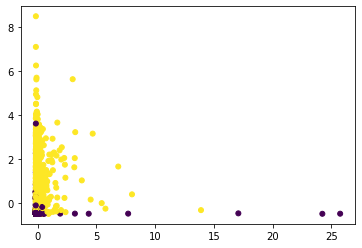

In [ ]:
#predicted labels
plt.scatter(ts_set.iloc[:, 5].values, ts_set.iloc[:, 2].values, c=test_pred_dt, s=25, cmap='viridis_r');

## Classification with AdaBoost
Ada-boost (or Adaptive Boosting) is a boosting classifier that combines multiple classifiers to increase the accuracy of classifiers. 
AdaBoost is an iterative ensemble method: it builds a strong classifier by combining multiple poorly performing classifiers. The basic concept behind Adaboost is to set the weights of classifiers and training the data sample in each iteration such that it ensures the accurate predictions of unusual observations.

### Grid search for parameter setting 
For improving the performance of our model, we can run a grid search: we can select the values we want to test for each parameter, and then run the GridSearchCV, which evaluates the best set of values parameters.

In [ ]:
param_dist = {
    'n_estimators': list(np.arange(10,100, 10)),
    #'learning_rate': [(0.97 + x / 100) for x in range(0, 8)],
    'learning_rate': [0.01, 0.1, 1.0]
    #'algorithm': ['SAMME', 'SAMME.R']
}

In [ ]:
#hyperparameter tuning with grid search CV
#n_iter_search = 10000
n_jobs_search = 100

#define the model
clf = AdaBoostClassifier(random_state=42)
kfold = StratifiedKFold(n_splits=10)
ab_search = GridSearchCV(estimator=clf, param_grid=param_dist, scoring=make_scorer(accuracy_score), n_jobs=n_jobs_search, cv=kfold) 
ab_search.fit(tr_set, tr_label)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=AdaBoostClassifier(random_state=42), n_jobs=100,
             param_grid={'learning_rate': [0.01, 0.1, 1.0],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90]},
             scoring=make_scorer(accuracy_score))

In [ ]:
ab_search.best_params_

{'learning_rate': 1.0, 'n_estimators': 90}

### Final Model

In [ ]:
ab = AdaBoostClassifier(**ab_search.best_params_).fit(tr_set, tr_label)

In [ ]:
#the predict function returns the actual predicted labels: we need them for the evaluation phase
train_pred_ab = ab.predict(tr_set)
test_pred_ab = ab.predict(ts_set)

### Evaluation of the AdaBoost: compute accuracy, precision, recall, confusion matrix
After having fitted the model, it is important to understand how the model is performing. To evaluate the goodness of the model, we can compute several metrics, such as accuracy, precision and recall. Pay attention to the fact that not all the metrics are meaningfull, depending on the imbalance in the dataset.

In [ ]:
#evaulate the accuracy on the train set and the test set
#metrics also contains precision, recall, f1 and the support
print('Accuracy train set ', metrics.accuracy_score(tr_label, train_pred_ab))
print('Accuracy test set ', metrics.accuracy_score(ts_label, test_pred_ab))
print('Precision train set ', metrics.precision_score(tr_label, train_pred_ab, average='weighted'))
print('Recall train set ', metrics.recall_score(tr_label, train_pred_ab, average='weighted'))
print('F1 score train set ', metrics.f1_score(tr_label, train_pred_ab, average='weighted'))
print('Support train set ', metrics.precision_recall_fscore_support(tr_label, train_pred_ab))

Accuracy train set  0.8380404084292853
Accuracy test set  0.8349261511728931
Precision train set  0.8552685930778439
Recall train set  0.8380404084292853
F1 score train set  0.8345820246831636
Support train set  (array([0.93442118, 0.78549849]), array([0.70368653, 0.95646842]), array([0.80280386, 0.86259331]), array([4313, 4893]))


In [ ]:
#compute the performance of the model
report_scores(ts_label, test_pred_ab)

              precision    recall  f1-score   support

   human (0)       0.93      0.70      0.80      1079
     bot (1)       0.78      0.96      0.86      1223

    accuracy                           0.83      2302
   macro avg       0.86      0.83      0.83      2302
weighted avg       0.85      0.83      0.83      2302



To better evaluate the performance of our model, we use the cross-validation. We can do so exploiting a function from sklearn. Then, we can compute the score array for test/train scores on each cv split as well as the time for fitting/scoring the estimator on the train set for each cv split.

In [ ]:
scores = cross_validate(ab, tr_set, tr_label, cv=3, return_train_score= True)
print('Fit time ', statistics.mean(scores['fit_time']))
print('Score time ', statistics.mean(scores['score_time']))
print('Test score ', statistics.mean(scores['test_score']))
print('Train score ', statistics.mean(scores['train_score']))

Fit time  1.0068205992380779
Score time  0.0850840409596761
Test score  0.8324995125159149
Train score  0.8402126411635104


Another kind of evaluation is the confusion matrix, in which we can clearly see the number of true positive, false positive, true negative, false negative.

In [ ]:
#compute confusion matrix
cm = confusion_matrix(ts_label, test_pred_ab)
cm

array([[ 753,  326],
       [  54, 1169]])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


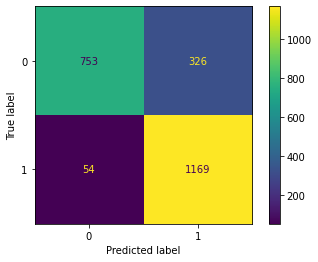

In [ ]:
#it is possible to plot the confusion matrix 
plot_confusion_matrix(ab, ts_set, ts_label)
plt.show() 

Another visualization of the behaviour of the model is to exploit scatter plots. We can plot the data points, w.r.t. 2 or 3 features, coloring the points depending on the labels: first, with the original labels, then the predicted labels.

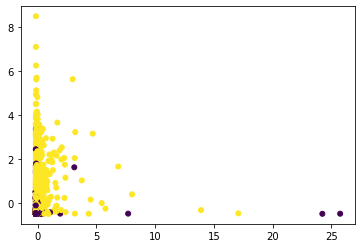

In [ ]:
#true labels
plt.scatter(ts_set.iloc[:, 5].values, ts_set.iloc[:, 2].values, c=ts_label.values, s=25, cmap='viridis_r');

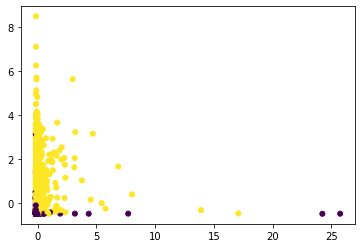

In [ ]:
#predicted labels
plt.scatter(ts_set.iloc[:, 5].values, ts_set.iloc[:, 2].values, c=test_pred_ab, s=25, cmap='viridis_r');

## Classification with AdaBoost + Decision Tree as base_estimator
In this model, a decision tree is boosted using the AdaBoost algorithm on a 1D sinusoidal dataset with a small amount of Gaussian noise. 299 boosts (300 decision trees) is compared with a single decision tree regressor. As the number of boosts is increased the regressor can fit more detail. 

Adaboost has many parameters, we can select the base classifier, which can be a DecisionTree, a Logistic Regression and so on, we can select the number of estimators and the learning rate.

In [ ]:
base = decision_tree(**dt_cv.best_params_)
ab_dc = AdaBoostClassifier(base_estimator=base, **ab_search.best_params_)
ab_dc.fit(tr_set, tr_label)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=6,
                                                         max_features=6,
                                                         min_samples_leaf=8),
                   n_estimators=90)

In [ ]:
#the predict function returns the actual predicted labels: we need them for the evaluation phase
train_pred_ab_dc = ab_dc.predict(tr_set)
test_pred_ab_dc = ab_dc.predict(ts_set)

### Evaluation of the AdaBoost+DecisionTree: compute accuracy, precision, recall, confusion matrix
After having fitted the model, it is important to understand how the model is performing. To evaluate the goodness of the model, we can compute several metrics, such as accuracy, precision and recall. Pay attention to the fact that not all the metrics are meaningfull, depending on the imbalance in the dataset.

In [ ]:
#evaulate the accuracy on the train set and the test set
#metrics also contains precision, recall, f1 and the support
print('Accuracy train set ', metrics.accuracy_score(tr_label, train_pred_ab_dc))
print('Accuracy test set ', metrics.accuracy_score(ts_label, test_pred_ab_dc))
print('Precision train set ', metrics.precision_score(tr_label, train_pred_ab_dc, average='weighted'))
print('Recall train set ', metrics.recall_score(tr_label, train_pred_ab_dc, average='weighted'))
print('F1 score train set ', metrics.f1_score(tr_label, train_pred_ab_dc, average='weighted'))
print('Support train set ', metrics.precision_recall_fscore_support(tr_label, train_pred_ab_dc))

Accuracy train set  0.9605691940039105
Accuracy test set  0.7966985230234579
Precision train set  0.9615050031838399
Recall train set  0.9605691940039105
F1 score train set  0.9604871648167198
Support train set  (array([0.98241329, 0.94307512]), array([0.93252956, 0.9852851 ]), array([0.9568217 , 0.96371814]), array([4313, 4893]))


In [ ]:
#compute the performance of the model
report_scores(ts_label, test_pred_ab_dc)

              precision    recall  f1-score   support

   human (0)       0.81      0.75      0.77      1079
     bot (1)       0.79      0.84      0.81      1223

    accuracy                           0.80      2302
   macro avg       0.80      0.79      0.79      2302
weighted avg       0.80      0.80      0.80      2302



To better evaluate the performance of our model, we use the cross-validation. We can do so exploiting a function from sklearn. Then, we can compute the score array for test/train scores on each cv split as well as the time for fitting/scoring the estimator on the train set for each cv split.

In [ ]:
scores = cross_validate(ab_dc, tr_set, tr_label, cv=3, return_train_score= True)
print('Fit time ', statistics.mean(scores['fit_time']))
print('Score time ', statistics.mean(scores['score_time']))
print('Test score ', statistics.mean(scores['test_score']))
print('Train score ', statistics.mean(scores['train_score']))

Fit time  1.2272223631540935
Score time  0.10120296478271484
Test score  0.7755808778225399
Train score  0.9926677987409562


Another kind of evaluation is the confusion matrix, in which we can clearly see the number of true positive, false positive, true negative, false negative.

In [ ]:
#compute confusion matrix
cm = confusion_matrix(ts_label, test_pred_ab_dc)
cm

array([[ 806,  273],
       [ 195, 1028]])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


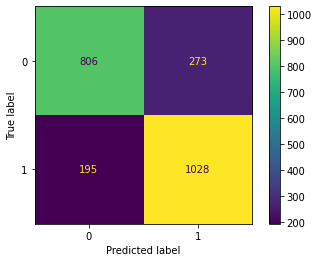

In [ ]:
#it is possible to plot the confusion matrix 
plot_confusion_matrix(ab_dc, ts_set, ts_label)
plt.show() 

Another visualization of the behaviour of the model is to exploit scatter plots. We can plot the data points, w.r.t. 2 or 3 features, coloring the points depending on the labels: first, with the original labels, then the predicted labels.

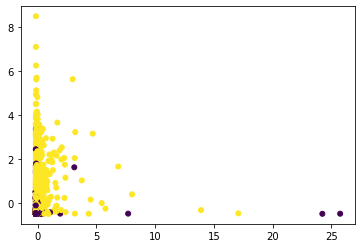

In [ ]:
#true labels
plt.scatter(ts_set.iloc[:, 5].values, ts_set.iloc[:, 2].values, c=ts_label.values, s=25, cmap='viridis_r');

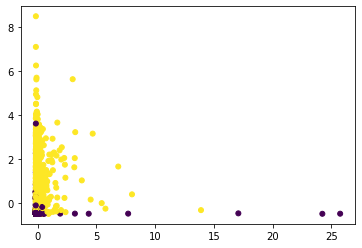

In [ ]:
#predicted labels
plt.scatter(ts_set.iloc[:, 5].values, ts_set.iloc[:, 2].values, c=test_pred_dt, s=25, cmap='viridis_r');

## Classification with Random Forest
The Random Forest is an ensemble method composed by Decision Trees. Hence, there are several parameters to set: about the trees and the ensemble method, such as bootstrap and number of estimators. The performance of this model greatly depends on the paramters set. Refer to the official documentation to see the complete set of parameters.

### Random search for parameter setting 
For improving the performance of our model, we can run a grid search: we can select the values we want to test for each parameter, and then run the RandomizedSearchCV, which evaluates the best set of values parameters with a good trade-off with time costs.

In [ ]:
param_dist = {'criterion':['gini', 'entropy'],
              'max_depth': [None, 2, 3, 4, 5, 6, 7, 8, 9],   
              'min_samples_split': sp_randint(2,60),    #randint(2, 40), 
              'min_samples_leaf': sp_randint(2,60),   #np.arange(start=10, stop=60, step=1), 
              'max_features': [None, "auto", "sqrt", "log2", 2, 3, 4, 5, 6, 7, 8, 9],  
              'bootstrap': [True, False],
              'class_weight':['balanced', None, {0: 0.3, 1: 0.7}]
              }

In [ ]:
#hyperparameter tuning with random search CV
n_iter_search = 1000
n_jobs_search = -1

#define the model
clf = RandomForestClassifier(n_estimators=30)
kfold = StratifiedKFold(n_splits=10)

rf_search = RandomizedSearchCV(estimator=clf, param_distributions=param_dist, n_iter=n_iter_search, scoring=make_scorer(accuracy_score), n_jobs=n_jobs_search, cv=kfold) 
rf_search.fit(tr_set, tr_label)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=RandomForestClassifier(n_estimators=30),
                   n_iter=1000, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'class_weight': ['balanced', None,
                                                         {0: 0.3, 1: 0.7}],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 2, 3, 4, 5, 6, 7, 8,
                                                      9],
                                        'max_features': [None, 'auto', 'sqrt',
                                                         'log2', 2, 3, 4, 5, 6,
                                                         7, 8, 9],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f419af90640>,
           

In [ ]:
rf_search.best_params_

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'min_samples_leaf': 4,
 'min_samples_split': 57}

### Final Model

In [ ]:
rf = RandomForestClassifier(**rf_search.best_params_).fit(tr_set, tr_label)

In [ ]:
#the predict function returns the actual predicted labels: we need them for the evaluation phase
train_pred_rf = rf.predict(tr_set)
test_pred_rf = rf.predict(ts_set)

### Evaluation of the Random Forest: compute accuracy, precision, recall, confusion matrix
After having fitted the model, it is important to understand how the model is performing. To evaluate the goodness of the model, we can compute several metrics, such as accuracy, precision and recall. Pay attention to the fact that not all the metrics are meaningfull, depending on the imbalance in the dataset.

In [ ]:
#evaulate the accuracy on the train set and the test set
#metrics also contains precision, recall, f1 and the support
print('Accuracy train set ', metrics.accuracy_score(tr_label, train_pred_rf))
print('Accuracy test set ', metrics.accuracy_score(ts_label, test_pred_rf))
print('Precision train set ', metrics.precision_score(tr_label, train_pred_rf, average='weighted'))
print('Recall train set ', metrics.recall_score(tr_label, train_pred_rf, average='weighted'))
print('F1 score train set ', metrics.f1_score(tr_label, train_pred_rf, average='weighted'))
print('Support train set ', metrics.precision_recall_fscore_support(tr_label, train_pred_rf))

Accuracy train set  0.8491201390397567
Accuracy test set  0.8449174630755865
Precision train set  0.8666375992571186
Recall train set  0.8491201390397567
F1 score train set  0.8459695174717246
Support train set  (array([0.94819129, 0.79475101]), array([0.71713425, 0.96546086]), array([0.81663366, 0.871828  ]), array([4313, 4893]))


In [ ]:
#compute the performance of the model
report_scores(ts_label, test_pred_rf)

              precision    recall  f1-score   support

   human (0)       0.94      0.71      0.81      1079
     bot (1)       0.79      0.96      0.87      1223

    accuracy                           0.84      2302
   macro avg       0.87      0.84      0.84      2302
weighted avg       0.86      0.84      0.84      2302



To better evaluate the performance of our model, we use the cross-validation. We can do so exploiting a function from sklearn. Then, we can compute the score array for test/train scores on each cv split as well as the time for fitting/scoring the estimator on the train set for each cv split.

In [ ]:
scores = cross_validate(rf, tr_set, tr_label, cv=3, return_train_score= True)
print('Fit time ', statistics.mean(scores['fit_time']))
print('Score time ', statistics.mean(scores['score_time']))
print('Test score ', statistics.mean(scores['test_score']))
print('Train score ', statistics.mean(scores['train_score']))

Fit time  3.9914594491322837
Score time  0.05824152628580729
Test score  0.8354326302658724
Train score  0.8477620595972002


Another kind of evaluation is the confusion matrix, in which we can clearly see the number of true positive, false positive, true negative, false negative.

In [ ]:
#compute confusion matrix
cm = confusion_matrix(ts_label, test_pred_rf)
cm

array([[ 767,  312],
       [  45, 1178]])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


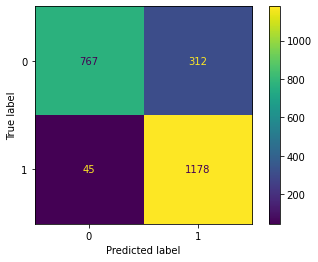

In [ ]:
#it is possible to plot the confusion matrix 
plot_confusion_matrix(rf, ts_set, ts_label)
plt.show() 

Another visualization of the behaviour of the model is to exploit scatter plots. We can plot the data points, w.r.t. 2 or 3 features, coloring the points depending on the labels: first, with the original labels, then the predicted labels.

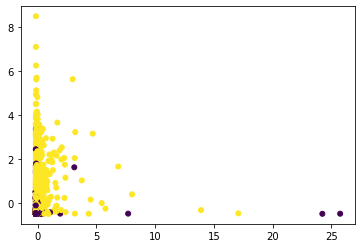

In [ ]:
#true labels
plt.scatter(ts_set.iloc[:, 5].values, ts_set.iloc[:, 2].values, c=ts_label.values, s=25, cmap='viridis_r');

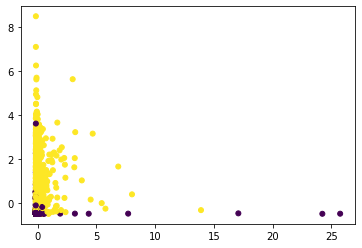

In [ ]:
#predicted labels
plt.scatter(ts_set.iloc[:, 5].values, ts_set.iloc[:, 2].values, c=test_pred_dt, s=25, cmap='viridis_r');

## Classification with Naive Bayes (GaussianNB)
Bayes' Theorem provides a way that we can calculate the probability of a piece of data belonging to a given class, given our prior knowledge. Bayes' Theorem is stated as:

P(class|data) = (P(data|class) * P(class)) / P(data)
Where P(class|data) is the probability of class given the provided data.

Gaussian Naïve Bayes is the extension of naïve Bayes. While other functions are used to estimate data distribution, Gaussian or normal distribution is the simplest to implement as you will need to calculate the mean and standard deviation for the training data.

### Grid search for parameter setting 
For improving the performance of our model, we can run a grid search: we can select the values we want to test for each parameter, and then run the GridSearchCV, which evaluates the best set of values parameters.

In [ ]:
param_dist = {'var_smoothing': np.logspace(0,-9, num=100)
              }

In [ ]:
#hyperparameter tuning with random search CV
#n_iter_search = 10000
n_jobs_search = -1

#define the model
clf = GaussianNB()
kfold = StratifiedKFold(n_splits=10)
gnb_search = GridSearchCV(estimator=clf, param_grid=param_dist, scoring=make_scorer(accuracy_score), n_jobs=n_jobs_search, cv=kfold) 
gnb_search.fit(tr_set, tr_label)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring=make_scorer(accuracy_score))

In [ ]:
gnb_search.best_params_

{'var_smoothing': 0.008111308307896872}

### Final Model

In [ ]:
gnb = GaussianNB(**gnb_search.best_params_).fit(tr_set, tr_label)

In [ ]:
#the predict function returns the actual predicted labels: we need them for the evaluation phase
train_pred_gnb = gnb.predict(tr_set)
test_pred_gnb = gnb.predict(ts_set)

### Evaluation of the GaussianNB: compute accuracy, precision, recall, confusion matrix
After having fitted the model, it is important to understand how the model is performing. To evaluate the goodness of the model, we can compute several metrics, such as accuracy, precision and recall. Pay attention to the fact that not all the metrics are meaningfull, depending on the imbalance in the dataset.

In [ ]:
#evaulate the accuracy on the train set and the test set
#metrics also contains precision, recall, f1 and the support
print('Accuracy train set ', metrics.accuracy_score(tr_label, train_pred_gnb))
print('Accuracy test set ', metrics.accuracy_score(ts_label, test_pred_gnb))
print('Precision train set ', metrics.precision_score(tr_label, train_pred_gnb, average='weighted'))
print('Recall train set ', metrics.recall_score(tr_label, train_pred_gnb, average='weighted'))
print('F1 score train set ', metrics.f1_score(tr_label, train_pred_gnb, average='weighted'))
print('Support train set ', metrics.precision_recall_fscore_support(tr_label, train_pred_gnb))

Accuracy train set  0.7563545513795351
Accuracy test set  0.7545612510860121
Precision train set  0.8018950514125043
Recall train set  0.7563545513795351
F1 score train set  0.7423356550619169
Support train set  (array([0.92176039, 0.69623815]), array([0.52446093, 0.96076027]), array([0.6685385 , 0.80738514]), array([4313, 4893]))


In [ ]:
#compute the performance of the model
report_scores(ts_label, test_pred_gnb)

              precision    recall  f1-score   support

   human (0)       0.92      0.52      0.67      1079
     bot (1)       0.69      0.96      0.81      1223

    accuracy                           0.75      2302
   macro avg       0.81      0.74      0.74      2302
weighted avg       0.80      0.75      0.74      2302



To better evaluate the performance of our model, we use the cross-validation. We can do so exploiting a function from sklearn. Then, we can compute the score array for test/train scores on each cv split as well as the time for fitting/scoring the estimator on the train set for each cv split.

In [ ]:
scores = cross_validate(gnb, tr_set, tr_label, cv=3, return_train_score= True)
print('Fit time ', statistics.mean(scores['fit_time']))
print('Score time ', statistics.mean(scores['score_time']))
print('Test score ', statistics.mean(scores['test_score']))
print('Train score ', statistics.mean(scores['train_score']))

Fit time  0.011603514353434244
Score time  0.004607041676839192
Test score  0.7551597906983364
Train score  0.7552682664405845


Another kind of evaluation is the confusion matrix, in which we can clearly see the number of true positive, false positive, true negative, false negative.

In [ ]:
#compute confusion matrix
cm = confusion_matrix(ts_label, test_pred_gnb)
cm

array([[ 564,  515],
       [  50, 1173]])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


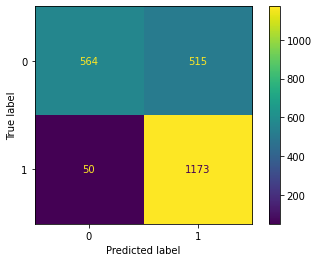

In [ ]:
#it is possible to plot the confusion matrix 
plot_confusion_matrix(gnb, ts_set, ts_label)
plt.show() 

Another visualization of the behaviour of the model is to exploit scatter plots. We can plot the data points, w.r.t. 2 or 3 features, coloring the points depending on the labels: first, with the original labels, then the predicted labels.

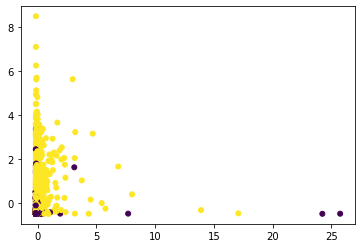

In [ ]:
#true labels
plt.scatter(ts_set.iloc[:, 5].values, ts_set.iloc[:, 2].values, c=ts_label.values, s=25, cmap='viridis_r');

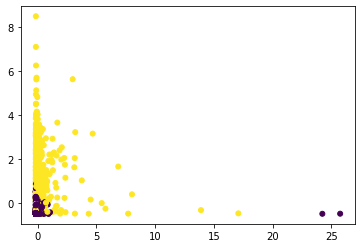

In [ ]:
#predicted labels
plt.scatter(ts_set.iloc[:, 5].values, ts_set.iloc[:, 2].values, c=test_pred_gnb, s=25, cmap='viridis_r');

## Classification with KNN (K-Nearest Neighbors)
Neighbors-based classification is a type of instance-based learning or non-generalizing learning: it does not attempt to construct a general internal model, but simply stores instances of the training data. Classification is computed from a simple majority vote of the nearest neighbors of each point: a query point is assigned the data class which has the most representatives within the nearest neighbors of the point.

The -neighbors classification in KNeighborsClassifier from ScikitLearn is the most commonly used method. The optimal choice of the value  is highly data-dependent: in general a larger choice suppresses the effects of noise, but makes the classification boundaries less distinct.

### Random search for parameter setting 
For improving the performance of our model, we can run a grid search: we can select the values we want to test for each parameter, and then run the RandomizedSearchCV, which evaluates the best set of values parameters with a good trade-off with time costs.

In [ ]:
param_dist = {'n_neighbors' : list(np.arange(10,500, 10)), #[5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan'],
               'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2,3],
              }

In [ ]:
#hyperparameter tuning with random search CV
n_iter_search = 100
n_jobs_search = -1

#define the model
clf = KNeighborsClassifier()
kfold = StratifiedKFold(n_splits=10)
knn_search = RandomizedSearchCV(estimator=clf, param_distributions=param_dist, scoring=make_scorer(accuracy_score), n_iter=n_iter_search, n_jobs=n_jobs_search, cv=kfold) #,
knn_search.fit(tr_set, tr_label)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=KNeighborsClassifier(), n_iter=100, n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'metric': ['minkowski', 'euclidean',
                                                   'manhattan'],
                                        'n_neighbors': [10, 20, 30, 40, 50, 60,
                                                        70, 80, 90, 100, 110,
                                                        120, 130, 140, 150, 160,
                                                        170, 180, 190, 200, 210,
                                                        220, 230, 240, 250, 260,
                                                        270, 280, 290, 300, ...],
                                        'p': [1, 2, 3],
       

In [ ]:
knn_search.best_params_

{'weights': 'distance',
 'p': 3,
 'n_neighbors': 50,
 'metric': 'manhattan',
 'algorithm': 'brute'}

### Final Model

In [ ]:
knn = KNeighborsClassifier(**knn_search.best_params_).fit(tr_set, tr_label)

In [ ]:
#the predict function returns the actual predicted labels: we need them for the evaluation phase
train_pred_knn = knn.predict(tr_set)
test_pred_knn = knn.predict(ts_set)

### Evaluation of the KNN: compute accuracy, precision, recall, confusion matrix
After having fitted the model, it is important to understand how the model is performing. To evaluate the goodness of the model, we can compute several metrics, such as accuracy, precision and recall. Pay attention to the fact that not all the metrics are meaningfull, depending on the imbalance in the dataset.

In [ ]:
#evaulate the accuracy on the train set and the test set
#metrics also contains precision, recall, f1 and the support
print('Accuracy train set ', metrics.accuracy_score(tr_label, train_pred_knn))
print('Accuracy test set ', metrics.accuracy_score(ts_label, test_pred_knn))
print('Precision train set ', metrics.precision_score(tr_label, train_pred_knn, average='weighted'))
print('Recall train set ', metrics.recall_score(tr_label, train_pred_knn, average='weighted'))
print('F1 score train set ', metrics.f1_score(tr_label, train_pred_knn, average='weighted'))
print('Support train set ', metrics.precision_recall_fscore_support(tr_label, train_pred_knn))

Accuracy train set  1.0
Accuracy test set  0.7936576889661164
Precision train set  1.0
Recall train set  1.0
F1 score train set  1.0
Support train set  (array([1., 1.]), array([1., 1.]), array([1., 1.]), array([4313, 4893]))


In [ ]:
#compute the performance of the model
report_scores(ts_label, test_pred_knn)

              precision    recall  f1-score   support

   human (0)       0.91      0.62      0.74      1079
     bot (1)       0.74      0.95      0.83      1223

    accuracy                           0.79      2302
   macro avg       0.83      0.78      0.78      2302
weighted avg       0.82      0.79      0.79      2302



To better evaluate the performance of our model, we use the cross-validation. We can do so exploiting a function from sklearn. Then, we can compute the score array for test/train scores on each cv split as well as the time for fitting/scoring the estimator on the train set for each cv split.

In [ ]:
scores = cross_validate(knn, tr_set, tr_label, cv=3, return_train_score= True)
print('Fit time ', statistics.mean(scores['fit_time']))
print('Score time ', statistics.mean(scores['score_time']))
print('Test score ', statistics.mean(scores['test_score']))
print('Train score ', statistics.mean(scores['train_score']))

Fit time  0.007295052210489909
Score time  1.3247094949086506
Test score  0.7922012175702717
Train score  1.0


Another kind of evaluation is the confusion matrix, in which we can clearly see the number of true positive, false positive, true negative, false negative.

In [ ]:
#compute confusion matrix
cm = confusion_matrix(ts_label, test_pred_knn)
cm

array([[ 666,  413],
       [  62, 1161]])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


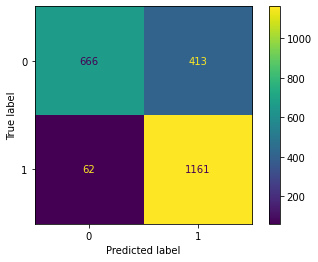

In [ ]:
#it is possible to plot the confusion matrix 
plot_confusion_matrix(knn, ts_set, ts_label)
plt.show() 

Another visualization of the behaviour of the model is to exploit scatter plots. We can plot the data points, w.r.t. 2 or 3 features, coloring the points depending on the labels: first, with the original labels, then the predicted labels.

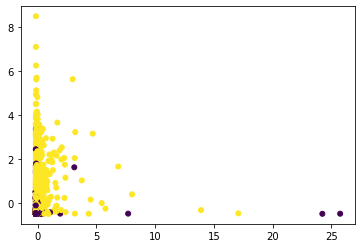

In [ ]:
#true labels
plt.scatter(ts_set.iloc[:, 5].values, ts_set.iloc[:, 2].values, c=ts_label.values, s=25, cmap='viridis_r');

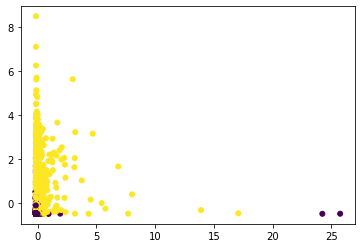

In [ ]:
#predicted labels
plt.scatter(ts_set.iloc[:, 5].values, ts_set.iloc[:, 2].values, c=test_pred_knn, s=25, cmap='viridis_r');

## Classification with SVC (C-Support Vector Classification)
Support Vector Machines (SVM) is a widely used supervised learning method and it can be used for regression, classification, anomaly detection problems. The SVM based classier is called the SVC (Support Vector Classifier) and we can use it in classification problems like the one we're working through. It uses the C regularization parameter to optimize the margin in hyperplane and it is also called C-SVC. 

### Random search for parameter setting 
For improving the performance of our model, we can run a grid search: we can select the values we want to test for each parameter, and then run the RandomizedSearchCV, which evaluates the best set of values parameters with a good trade-off with time costs.

In [ ]:
# X = input features (tr_set)
# y = labels (tr_label)

In [ ]:
param_dist = {
    'kernel': ['linear', 'rbf'], 
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'C': [0.1, 1, 10, 100]
}

In [ ]:
n_iter_search = 10
n_jobs_search = 10

clf = SVC(random_state=42)
kfold = StratifiedKFold(n_splits=10)

svc_search = RandomizedSearchCV(estimator=clf, param_distributions=param_dist, scoring=make_scorer(accuracy_score), n_jobs=n_jobs_search, n_iter=n_iter_search, cv=kfold) 
svc_search.fit(tr_set, tr_label)

/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=SVC(random_state=42), n_jobs=10,
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                                        'kernel': ['linear', 'rbf']},
                   scoring=make_scorer(accuracy_score))

In [ ]:
svc_search.best_params_

{'kernel': 'linear', 'gamma': 0.001, 'C': 100}

### Final Model

In [ ]:
svc = SVC(**svc_search.best_params_).fit(tr_set, tr_label)

In [ ]:
#the predict function returns the actual predicted labels: we need them for the evaluation phase
train_pred_svc = svc.predict(tr_set)
test_pred_svc = svc.predict(ts_set)

### Evaluation of the SVC: compute accuracy, precision, recall, confusion matrix
After having fitted the model, it is important to understand how the model is performing. To evaluate the goodness of the model, we can compute several metrics, such as accuracy, precision and recall. Pay attention to the fact that not all the metrics are meaningfull, depending on the imbalance in the dataset.

In [ ]:
#evaulate the accuracy on the train set and the test set
#metrics also contains precision, recall, f1 and the support
print('Accuracy train set ', metrics.accuracy_score(tr_label, train_pred_svc))
print('Accuracy test set ', metrics.accuracy_score(ts_label, test_pred_svc))
print('Precision train set ', metrics.precision_score(tr_label, train_pred_svc, average='weighted'))
print('Recall train set ', metrics.recall_score(tr_label, train_pred_svc, average='weighted'))
print('F1 score train set ', metrics.f1_score(tr_label, train_pred_svc, average='weighted'))
print('Support train set ', metrics.precision_recall_fscore_support(tr_label, train_pred_svc))

Accuracy train set  0.7810123832283293
Accuracy test set  0.7775847089487402
Precision train set  0.815972879855736
Recall train set  0.7810123832283293
F1 score train set  0.7714860105433432
Support train set  (array([0.92302026, 0.72161454]), array([0.58103408, 0.95728592]), array([0.71314741, 0.82290935]), array([4313, 4893]))


In [ ]:
#compute the performance of the model
report_scores(ts_label, test_pred_svc)

              precision    recall  f1-score   support

   human (0)       0.92      0.58      0.71      1079
     bot (1)       0.72      0.95      0.82      1223

    accuracy                           0.78      2302
   macro avg       0.82      0.77      0.76      2302
weighted avg       0.81      0.78      0.77      2302



To better evaluate the performance of our model, we use the cross-validation. We can do so exploiting a function from sklearn. Then, we can compute the score array for test/train scores on each cv split as well as the time for fitting/scoring the estimator on the train set for each cv split.

In [ ]:
scores = cross_validate(svc, tr_set, tr_label, cv=3, return_train_score= True)
print('Fit time ', statistics.mean(scores['fit_time']))
print('Score time ', statistics.mean(scores['score_time']))
print('Test score ', statistics.mean(scores['test_score']))
print('Train score ', statistics.mean(scores['train_score']))

Fit time  52.71221955617269
Score time  0.3173826535542806
Test score  0.7800348609533957
Train score  0.7819357341215767


Another kind of evaluation is the confusion matrix, in which we can clearly see the number of true positive, false positive, true negative, false negative.

In [ ]:
#compute confusion matrix
cm = confusion_matrix(ts_label, test_pred_svc)
cm

array([[ 625,  454],
       [  58, 1165]])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


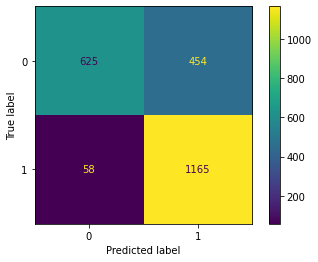

In [ ]:
#it is possible to plot the confusion matrix 
plot_confusion_matrix(svc, ts_set, ts_label)
plt.show() 

Another visualization of the behaviour of the model is to exploit scatter plots. We can plot the data points, w.r.t. 2 or 3 features, coloring the points depending on the labels: first, with the original labels, then the predicted labels.

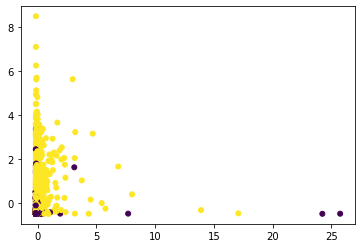

In [ ]:
#true labels
plt.scatter(ts_set.iloc[:, 5].values, ts_set.iloc[:, 2].values, c=ts_label.values, s=25, cmap='viridis_r');

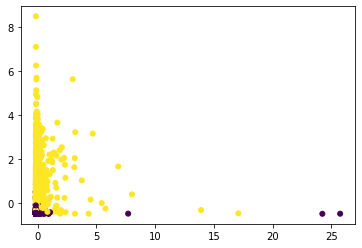

In [ ]:
#predicted labels
plt.scatter(ts_set.iloc[:, 5].values, ts_set.iloc[:, 2].values, c=test_pred_svc, s=25, cmap='viridis_r');

## Classification with Multi Layer Perceptron
Multilayer perceptron (MLP) is a technique of feed-forward artificial neural networks using a back propagation learning method to classify the target variable used for supervised learning and classification.

### Random search for parameter setting 
For improving the performance of our model, we can run a grid search: we can select the values we want to test for each parameter, and then run the RandomizedSearchCV, which evaluates the best set of values parameters with a good trade-off with time costs.

In [ ]:
param_dist = {
    'hidden_layer_sizes': [(100,), (50,100,)],
    'activation': ['tanh','relu','lbfgs'],
    'solver': ['sgd', 'adam'],
    'learning_rate': ['constant','adaptive','invscaling'],
    'alpha': [0.0001, 0.05]
}

In [ ]:
n_iter_search = 100
n_jobs_search = 10

clf = MLPClassifier(random_state=42)
kfold = StratifiedKFold(n_splits=10)

mlp_search = RandomizedSearchCV(estimator=clf, param_distributions=param_dist, scoring=make_scorer(accuracy_score), n_jobs=n_jobs_search, n_iter=n_iter_search, cv=kfold) 
mlp_search.fit(tr_set, tr_label)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 72 is smaller than n_iter=100. Running 72 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
240 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilay

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=MLPClassifier(random_state=42), n_iter=100,
                   n_jobs=10,
                   param_distributions={'activation': ['tanh', 'relu', 'lbfgs'],
                                        'alpha': [0.0001, 0.05],
                                        'hidden_layer_sizes': [(100,),
                                                               (50, 100)],
                                        'learning_rate': ['constant',
                                                          'adaptive',
                                                          'invscaling'],
                                        'solver': ['sgd', 'adam']},
                   scoring=make_scorer(accuracy_score))

In [ ]:
mlp_search.best_params_

{'solver': 'adam',
 'learning_rate': 'constant',
 'hidden_layer_sizes': (100,),
 'alpha': 0.05,
 'activation': 'relu'}

### Final Model

In [ ]:
mlp = MLPClassifier(**mlp_search.best_params_).fit(tr_set, tr_label)

In [ ]:
#the predict function returns the actual predicted labels: we need them for the evaluation phase
train_pred_mlp = mlp.predict(tr_set)
test_pred_mlp = mlp.predict(ts_set)

### Evaluation of the MLP: compute accuracy, precision, recall, confusion matrix
After having fitted the model, it is important to understand how the model is performing. To evaluate the goodness of the model, we can compute several metrics, such as accuracy, precision and recall. Pay attention to the fact that not all the metrics are meaningfull, depending on the imbalance in the dataset.

In [ ]:
#evaulate the accuracy on the train set and the test set
#metrics also contains precision, recall, f1 and the support
print('Accuracy train set ', metrics.accuracy_score(tr_label, train_pred_mlp))
print('Accuracy test set ', metrics.accuracy_score(ts_label, test_pred_mlp))
print('Precision train set ', metrics.precision_score(tr_label, train_pred_mlp, average='weighted'))
print('Recall train set ', metrics.recall_score(tr_label, train_pred_mlp, average='weighted'))
print('F1 score train set ', metrics.f1_score(tr_label, train_pred_mlp, average='weighted'))
print('Support train set ', metrics.precision_recall_fscore_support(tr_label, train_pred_mlp))

Accuracy train set  0.8116445796219857
Accuracy test set  0.8049522154648132
Precision train set  0.8398050390431782
Recall train set  0.8116445796219857
F1 score train set  0.8053478169168783
Support train set  (array([0.93965223, 0.7517934 ]), array([0.63899838, 0.96382587]), array([0.76069556, 0.84470715]), array([4313, 4893]))


In [ ]:
#compute the performance of the model
report_scores(ts_label, test_pred_mlp)

              precision    recall  f1-score   support

   human (0)       0.93      0.63      0.75      1079
     bot (1)       0.75      0.96      0.84      1223

    accuracy                           0.80      2302
   macro avg       0.84      0.79      0.80      2302
weighted avg       0.83      0.80      0.80      2302



To better evaluate the performance of our model, we use the cross-validation. We can do so exploiting a function from sklearn. Then, we can compute the score array for test/train scores on each cv split as well as the time for fitting/scoring the estimator on the train set for each cv split.

In [ ]:
scores = cross_validate(mlp, tr_set, tr_label, cv=3, return_train_score= True)
print('Fit time ', statistics.mean(scores['fit_time']))
print('Score time ', statistics.mean(scores['score_time']))
print('Test score ', statistics.mean(scores['test_score']))
print('Train score ', statistics.mean(scores['train_score']))

Fit time  8.807076692581177
Score time  0.009208917617797852
Test score  0.8024112301039584
Train score  0.8165326595893175


Another kind of evaluation is the confusion matrix, in which we can clearly see the number of true positive, false positive, true negative, false negative.

In [ ]:
#compute confusion matrix
cm = confusion_matrix(ts_label, test_pred_mlp)
cm

array([[ 681,  398],
       [  51, 1172]])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


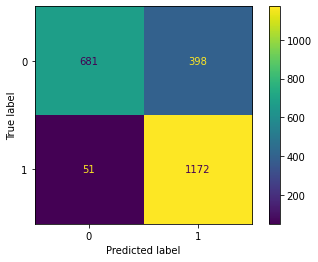

In [ ]:
#it is possible to plot the confusion matrix 
plot_confusion_matrix(mlp, ts_set, ts_label)
plt.show() 

Another visualization of the behaviour of the model is to exploit scatter plots. We can plot the data points, w.r.t. 2 or 3 features, coloring the points depending on the labels: first, with the original labels, then the predicted labels.

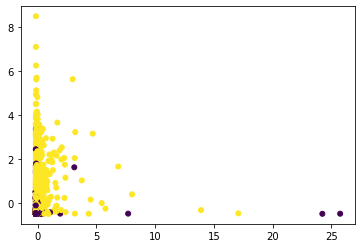

In [ ]:
#true labels
plt.scatter(ts_set.iloc[:, 5].values, ts_set.iloc[:, 2].values, c=ts_label.values, s=25, cmap='viridis_r');

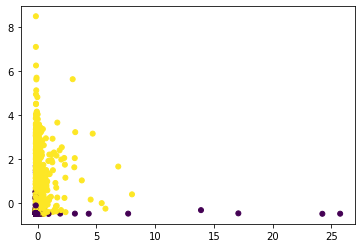

In [ ]:
#predicted labels
plt.scatter(ts_set.iloc[:, 5].values, ts_set.iloc[:, 2].values, c=test_pred_mlp, s=25, cmap='viridis_r');

## Classification with Stochastic Gradient Descent 
Stochastic Gradient Descent (SGD) is a simple yet very efficient approach to fitting linear classifiers and regressors under convex loss functions such as (linear) Support Vector Machines and Logistic Regression. 

The ScikitLearn class *SGDClassifier* implements a plain stochastic gradient descent learning routine which supports different loss functions and penalties for classification. As other classifiers, SGD has to be fitted with two arrays: an array X of shape (n_samples, n_features) holding the training samples, and an array y of shape (n_samples,) holding the target values (class labels) for the training samples.

### Random or grid search for parameter setting 
For improving the performance of our model, we can run a grid search: we can select the values we want to test for each parameter, and then run the grid search, which evaluates the best set of values parameters.

In [ ]:
param_dist = {
    'loss': ['hinge', 'log_loss', 'log', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
    'penalty':['l2', 'l1', 'elasticnet', None]
}

In [ ]:
n_iter_search = 100
n_jobs_search = -1

clf = SGDClassifier(random_state=42, max_iter= 1000)
kfold = StratifiedKFold(n_splits=10)

sgd_search = RandomizedSearchCV(estimator=clf, param_distributions=param_dist, scoring=make_scorer(accuracy_score), n_jobs=n_jobs_search, n_iter=n_iter_search, cv=kfold) 
sgd_search.fit(tr_set, tr_label)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 40 is smaller than n_iter=100. Running 40 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_g

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=SGDClassifier(random_state=42), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'loss': ['hinge', 'log_loss', 'log',
                                                 'modified_huber',
                                                 'squared_hinge', 'perceptron',
                                                 'squared_error', 'huber',
                                                 'epsilon_insensitive',
                                                 'squared_epsilon_insensitive'],
                                        'penalty': ['l2', 'l1', 'elasticnet',
                                                    None]},
                   scoring=make_scorer(accuracy_score))

In [ ]:
sgd_search.best_params_

{'penalty': 'l1', 'loss': 'log'}

### Final Model

In [ ]:
sgd = SGDClassifier(**sgd_search.best_params_).fit(tr_set, tr_label)

In [ ]:
#the predict function returns the actual predicted labels: we need them for the evaluation phase
train_pred_sgd = sgd.predict(tr_set)
test_pred_sgd = sgd.predict(ts_set)

### Evaluation of the SGD: compute accuracy, precision, recall, confusion matrix
After having fitted the model, it is important to understand how the model is performing. To evaluate the goodness of the model, we can compute several metrics, such as accuracy, precision and recall. Pay attention to the fact that not all the metrics are meaningfull, depending on the imbalance in the dataset.

In [ ]:
#evaulate the accuracy on the train set and the test set
#metrics also contains precision, recall, f1 and the support
print('Accuracy train set ', metrics.accuracy_score(tr_label, train_pred_sgd))
print('Accuracy test set ', metrics.accuracy_score(ts_label, test_pred_sgd))
print('Precision train set ', metrics.precision_score(tr_label, train_pred_sgd, average='weighted'))
print('Recall train set ', metrics.recall_score(tr_label, train_pred_sgd, average='weighted'))
print('F1 score train set ', metrics.f1_score(tr_label, train_pred_sgd, average='weighted'))
print('Support train set ', metrics.precision_recall_fscore_support(tr_label, train_pred_sgd))

Accuracy train set  0.787095372583098
Accuracy test set  0.7867072111207646
Precision train set  0.8167657549112225
Recall train set  0.787095372583098
F1 score train set  0.7790521938484997
Support train set  (array([0.91499118, 0.73018364]), array([0.60143751, 0.95074596]), array([0.72579743, 0.82599432]), array([4313, 4893]))


In [ ]:
#compute the performance of the model
report_scores(ts_label, test_pred_sgd)

              precision    recall  f1-score   support

   human (0)       0.92      0.60      0.72      1079
     bot (1)       0.73      0.95      0.83      1223

    accuracy                           0.79      2302
   macro avg       0.82      0.78      0.78      2302
weighted avg       0.82      0.79      0.78      2302



To better evaluate the performance of our model, we use the cross-validation. We can do so exploiting a function from sklearn. Then, we can compute the score array for test/train scores on each cv split as well as the time for fitting/scoring the estimator on the train set for each cv split.

In [ ]:
scores = cross_validate(sgd, tr_set, tr_label, cv=3, return_train_score= True)
print('Fit time ', statistics.mean(scores['fit_time']))
print('Score time ', statistics.mean(scores['score_time']))
print('Test score ', statistics.mean(scores['test_score']))
print('Train score ', statistics.mean(scores['train_score']))

Fit time  0.12403655052185059
Score time  0.003803094228108724
Test score  0.7820986497859106
Train score  0.7835651239778506


Another kind of evaluation is the confusion matrix, in which we can clearly see the number of true positive, false positive, true negative, false negative.

In [ ]:
#compute confusion matrix
cm = confusion_matrix(ts_label, test_pred_sgd)
cm

array([[ 647,  432],
       [  59, 1164]])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


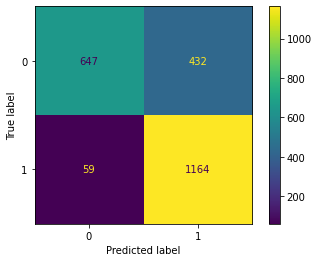

In [ ]:
#it is possible to plot the confusion matrix 
plot_confusion_matrix(sgd, ts_set, ts_label)
plt.show() 

Another visualization of the behaviour of the model is to exploit scatter plots. We can plot the data points, w.r.t. 2 or 3 features, coloring the points depending on the labels: first, with the original labels, then the predicted labels.

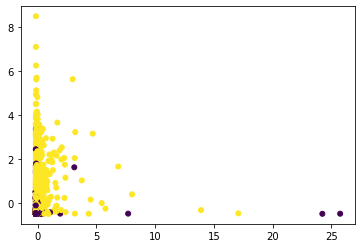

In [ ]:
#true labels
plt.scatter(ts_set.iloc[:, 5].values, ts_set.iloc[:, 2].values, c=ts_label.values, s=25, cmap='viridis_r');

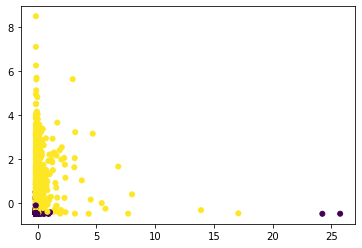

In [ ]:
#predicted labels
plt.scatter(ts_set.iloc[:, 5].values, ts_set.iloc[:, 2].values, c=test_pred_sgd, s=25, cmap='viridis_r');

# Classifiers Comparison

In [ ]:
def spot_errors(test_label, test_pred):
    spot_errors = []
    for i in range(len(test_label)):
        if test_label[i] != test_pred[i]:
            spot_errors.append('darkred')
        else:
            spot_errors.append('darkgray')
    return spot_errors

def classification_visualizer(test_set, test_label, test_pred, classifier_name):
    f, axs = plt.subplots(nrows=1, ncols=3, figsize=(24,8))
    a, b = 'activity_richness', 'statuses_count'
    errors = spot_errors(test_label, test_pred)
    labels = [test_label, test_pred, errors]
    titles = ['True Labels', 'Predicted Labels', 'Misclassifications']

    for i in range(3):
        axs[i].scatter(test_set[a], test_set[b], c=labels[i], s=20, cmap='cividis')
        axs[i].set_title(titles[i])
        axs[i].set_xlabel(a, fontdict={'fontsize': 'large'})
        axs[i].set_ylabel(b, fontdict={'fontsize': 'large'})

    plt.suptitle(('Visualization of the ' + classifier_name + ' classifier on the test set'),
                 fontsize=24, fontweight='bold')

    plt.show()

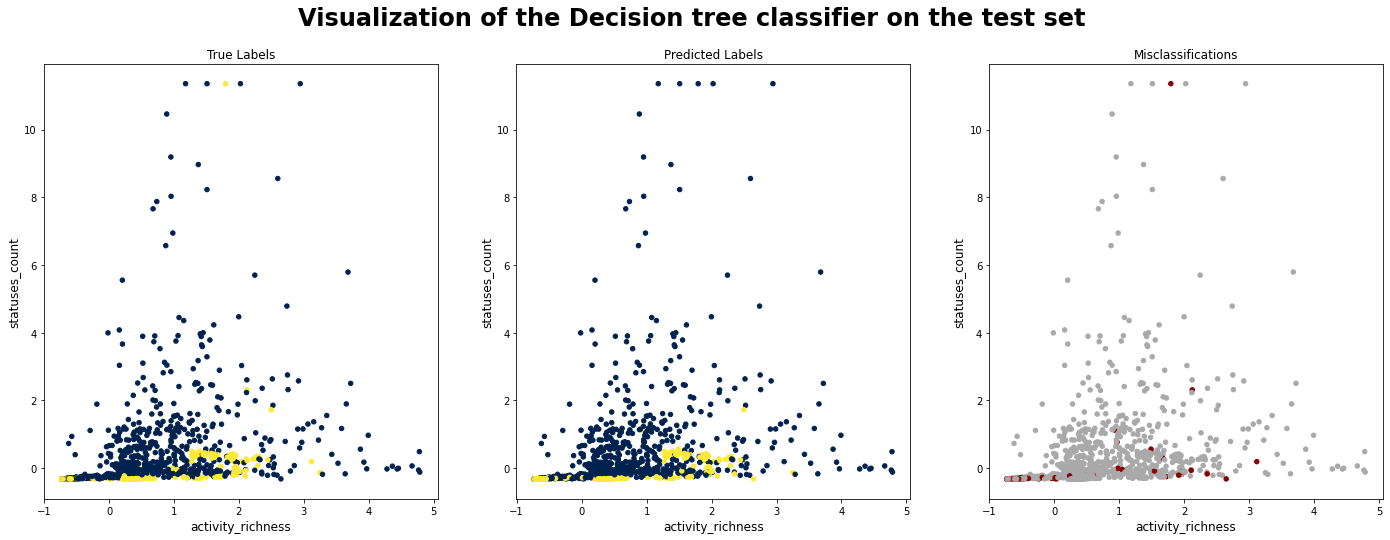

In [ ]:
classification_visualizer(ts_set, list(ts_label), test_pred_dt, 'Decision tree') 

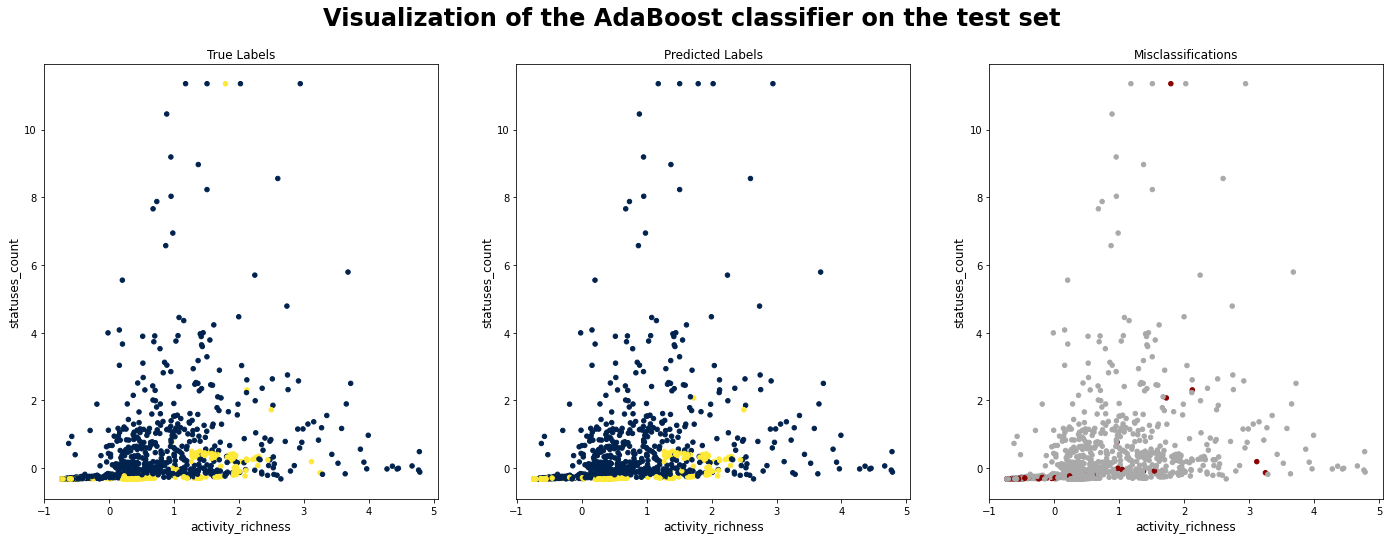

In [ ]:
classification_visualizer(ts_set, list(ts_label), test_pred_ab, 'AdaBoost') 

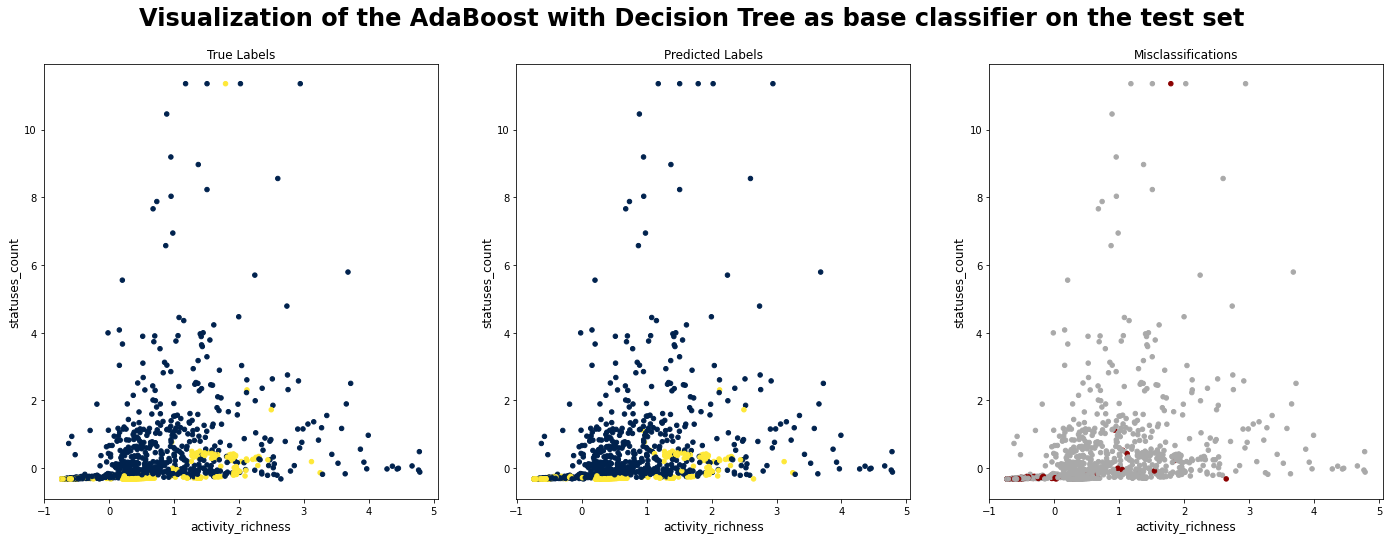

In [ ]:
classification_visualizer(ts_set, list(ts_label), test_pred_ab_dc, 'AdaBoost with Decision Tree as base') 

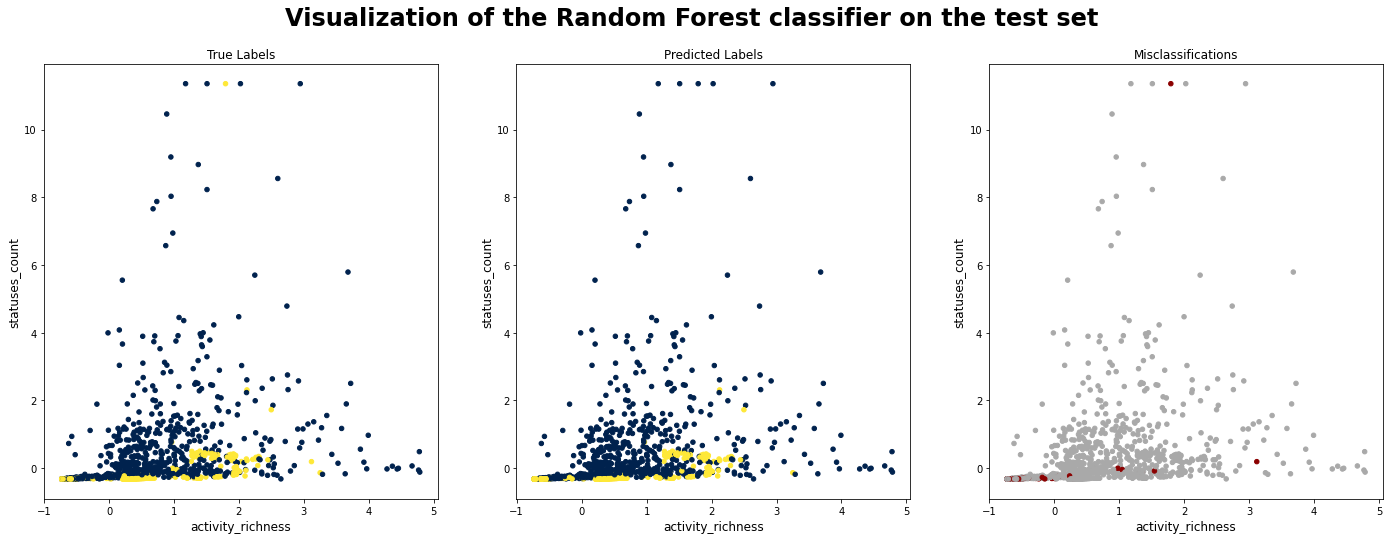

In [ ]:
classification_visualizer(ts_set, list(ts_label), test_pred_rf, 'Random Forest') 

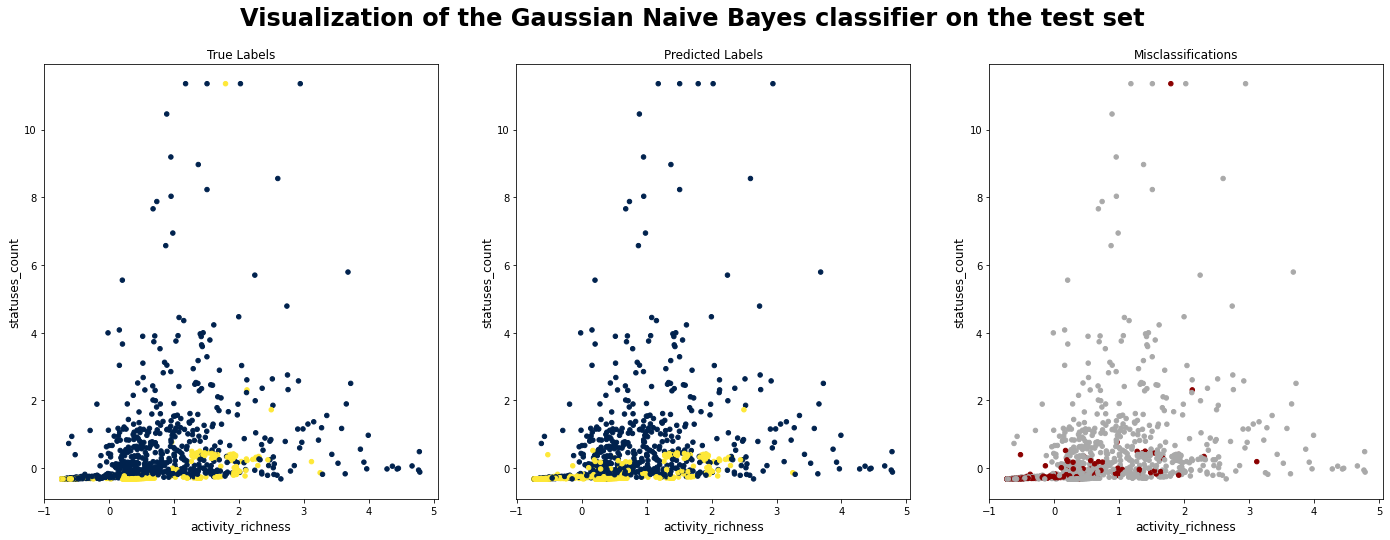

In [ ]:
classification_visualizer(ts_set, list(ts_label), test_pred_gnb, 'Gaussian Naive Bayes') 

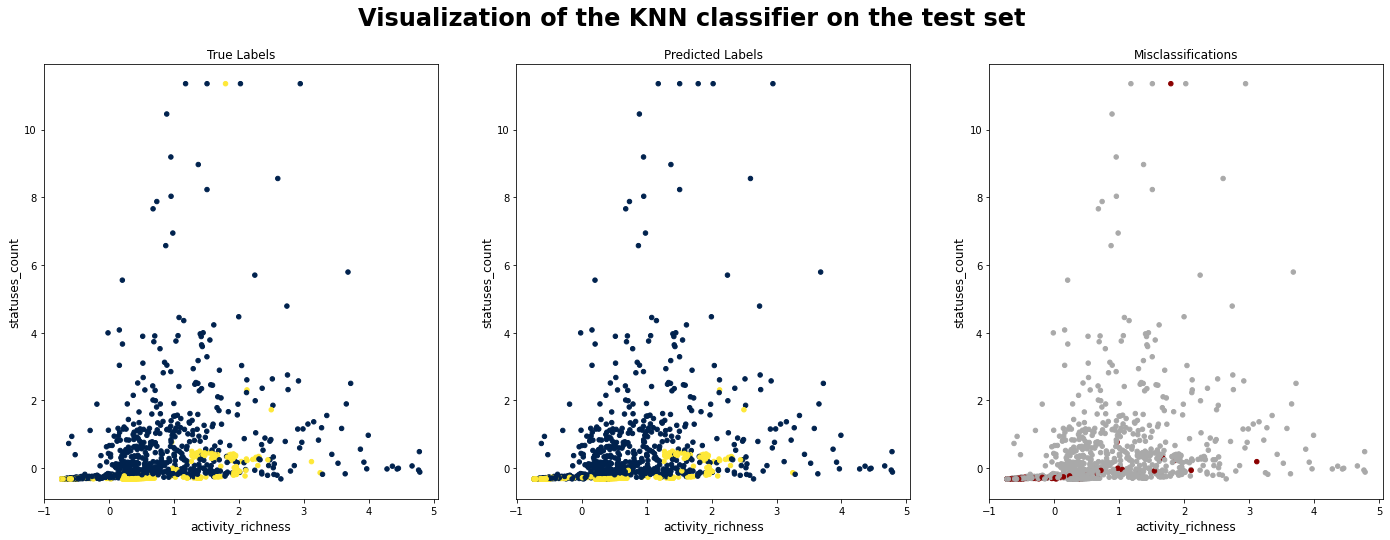

In [ ]:
classification_visualizer(ts_set, list(ts_label), test_pred_knn, 'KNN') 

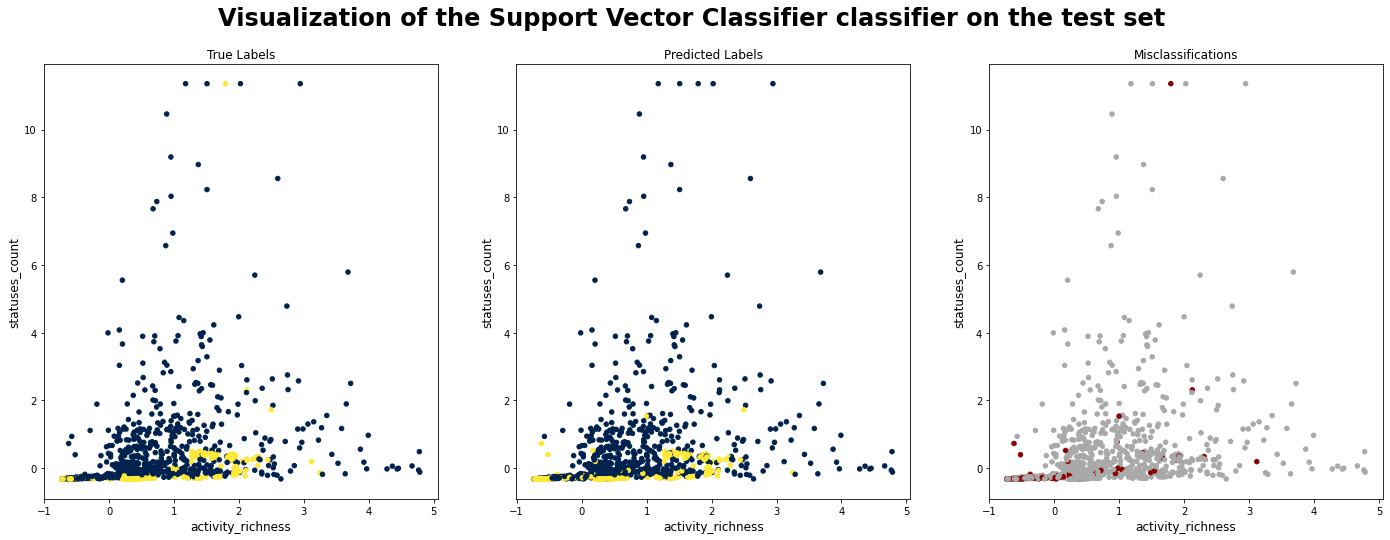

In [ ]:
classification_visualizer(ts_set, list(ts_label), test_pred_svc, 'Support Vector Classifier') 

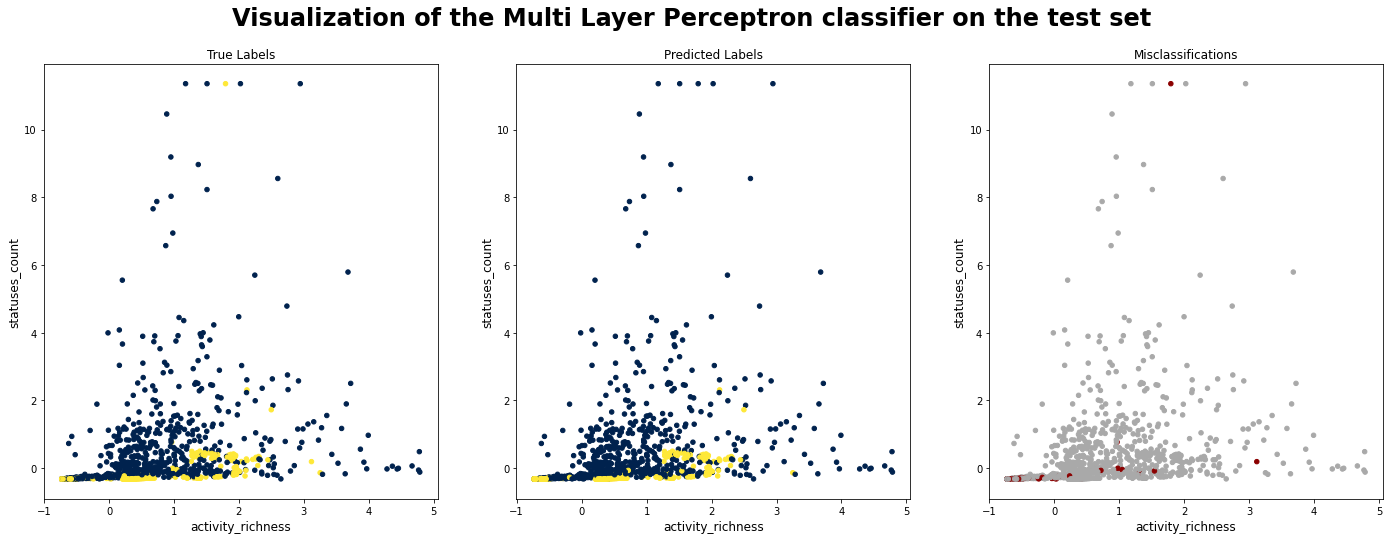

In [ ]:
classification_visualizer(ts_set, list(ts_label), test_pred_mlp, 'Multi Layer Perceptron') 

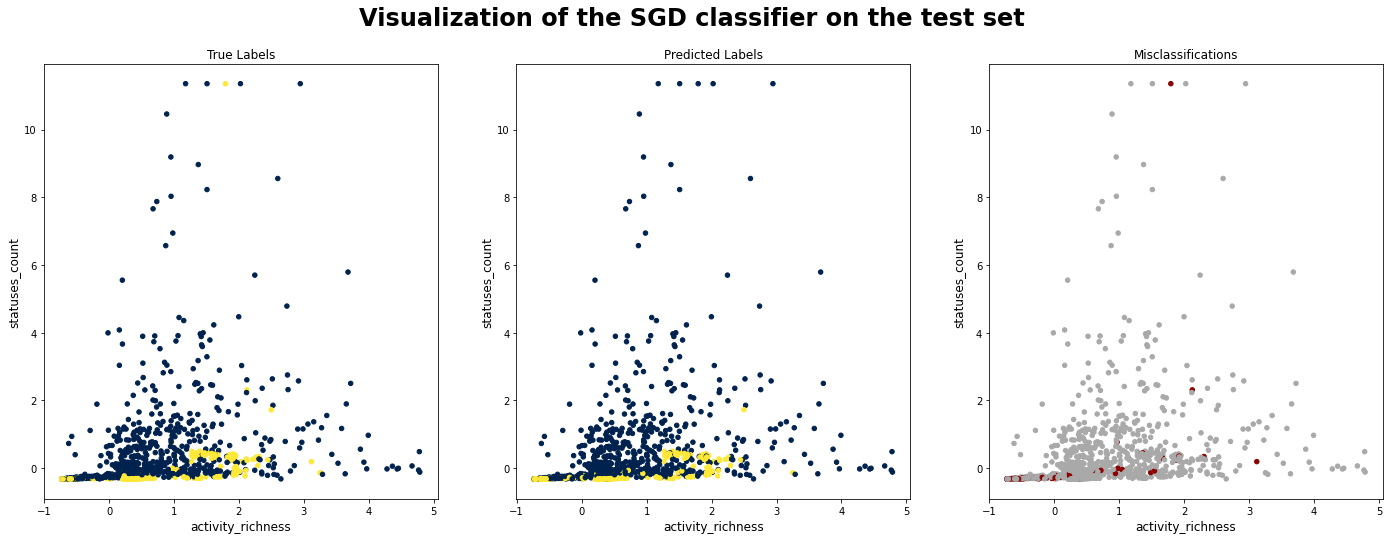

In [ ]:
classification_visualizer(ts_set, list(ts_label), test_pred_sgd, 'SGD') 

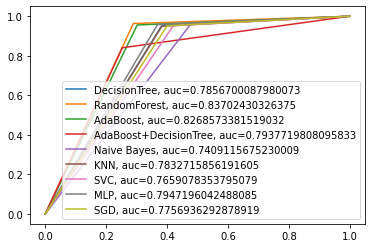

In [ ]:
plt.figure(0).clf()

fpr, tpr, thresh = metrics.roc_curve(ts_label, test_pred_dt)
auc = metrics.roc_auc_score(ts_label, test_pred_dt)
plt.plot(fpr,tpr,label="DecisionTree, auc="+str(auc))

fpr, tpr, thresh = metrics.roc_curve(ts_label, test_pred_rf)
auc = metrics.roc_auc_score(ts_label, test_pred_rf)
plt.plot(fpr,tpr,label="RandomForest, auc="+str(auc))

fpr, tpr, thresh = metrics.roc_curve(ts_label, test_pred_ab)
auc = metrics.roc_auc_score(ts_label, test_pred_ab)
plt.plot(fpr,tpr,label="AdaBoost, auc="+str(auc))

fpr, tpr, thresh = metrics.roc_curve(ts_label, test_pred_ab_dc)
auc = metrics.roc_auc_score(ts_label, test_pred_ab_dc)
plt.plot(fpr,tpr,label="AdaBoost+DecisionTree, auc="+str(auc))

fpr, tpr, thresh = metrics.roc_curve(ts_label, test_pred_gnb)
auc = metrics.roc_auc_score(ts_label, test_pred_gnb)
plt.plot(fpr,tpr,label="Naive Bayes, auc="+str(auc))

fpr, tpr, thresh = metrics.roc_curve(ts_label, test_pred_knn)
auc = metrics.roc_auc_score(ts_label, test_pred_knn)
plt.plot(fpr,tpr,label="KNN, auc="+str(auc))

fpr, tpr, thresh = metrics.roc_curve(ts_label, test_pred_svc)
auc = metrics.roc_auc_score(ts_label, test_pred_svc)
plt.plot(fpr,tpr,label="SVC, auc="+str(auc))

fpr, tpr, thresh = metrics.roc_curve(ts_label, test_pred_mlp)
auc = metrics.roc_auc_score(ts_label, test_pred_mlp)
plt.plot(fpr,tpr,label="MLP, auc="+str(auc))

fpr, tpr, thresh = metrics.roc_curve(ts_label, test_pred_sgd)
auc = metrics.roc_auc_score(ts_label, test_pred_sgd)
plt.plot(fpr,tpr,label="SGD, auc="+str(auc))

plt.legend(loc=0)